In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Day 1 - Mission statement:

# Exploring the data
# Data cleaning
    # checking for null values
    # uniformizing column names and figuring out what the column names even meeeaaaaaaaaaaan
# checking the multicollinearity
# 
#
#

In [3]:
path = ('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/')
file = os.listdir(path)
file

['.git',
 '.ipynb_checkpoints',
 'acronyms.csv',
 'FIFA project - exploring the data (num version).ipynb',
 'FIFA project - Modeling (num version).ipynb',
 'fifa21_male2.csv',
 'positions - Copy.csv',
 'positions.csv',
 'project_details.md']

In [4]:
data = pd.DataFrame()
for file in file:
    if file.endswith('2.csv'):
        data = pd.read_csv(path + file)       
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     CDM    RDM    RWB     LB   LCB    CB   RCB     RB    GK Gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [5]:
data.shape

(17125, 107)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [7]:
data.describe()

ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   
min       -1.000000     33.000000      6.000000      3.000000   
25%        0.000000    232.000000     41.000000     33.000000   
50%        4.000000    271.000000     56.000000     52.000000   
75%        9.000000    306.000000     65.000000     64.000000   
max       26.000000    437.000000     94.000000     95.000000   

       Heading Accuracy  ...  GK Positioning   GK Reflexes   Total Stats  \
count      17125.000000  ...    17125.000000  17125.000000  17125.000000   
mean          53.598832  ...       15.514277     15.738628   1631.256175   
std           16.947164  ...       16.406064     17.130908    260.357024   
min            5.000000  ...        1.000000      1.000000    731.000000   
25%           46.000000  ...        8.000000      8.000000   1492.000000   
50%           57.000000  ...       11.000000     11.000000   1659.000000   
75%           65.000000  ...       14.000000     14.000000   1812.000000   
max           93.000000  ...       93.000000     90.000000   2316.000000   

         Base Stats           PAC           SHO           PAS           DRI  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean     361.372146     68.091620     54.967299     58.926540     64.209869   
std       40.252290     11.147116     13.877605     10.186728      9.832734   
min      228.000000     25.000000     16.000000     25.000000     28.000000   
25%      333.000000     62.000000     46.000000     52.000000     59.000000   
50%      362.000000     69.000000     58.000000     60.000000     65.000000   
75%      390.000000     75.000000     65.000000     66.000000     71.000000   
max      498.000000     96.000000     93.000000     93.000000     95.000000   

                DEF           PHY  
count  17125.000000  17125.000000  
mean      50.266102     64.910715  
std       16.853801      9.660260  
min       12.000000     27.000000  
25%       35.000000     59.000000  
50%       53.000000     66.000000  
75%       64.000000     72.000000  
max       91.000000     93.000000  

[8 rows x 55 columns]

In [8]:
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [9]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns] 
data.head()

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     cdm    rdm    rwb     lb   lcb    cb   rcb     rb    gk gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [10]:
for col_name in data.columns: 
    print(col_name)

id
name
age
ova
nationality
club
bov
bp
position
player_photo
club_logo
flag_photo
pot
team_&_contract
height
weight
foot
growth
joined
loan_date_end
value
wage
release_clause
contract
attacking
crossing
finishing
heading_accuracy
short_passing
volleys
skill
dribbling
curve
fk_accuracy
long_passing
ball_control
movement
acceleration
sprint_speed
agility
reactions
balance
power
shot_power
jumping
stamina
strength
long_shots
mentality
aggression
interceptions
positioning
vision
penalties
composure
defending
marking
standing_tackle
sliding_tackle
goalkeeping
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
total_stats
base_stats
w/f
sm
a/w
d/w
ir
pac
sho
pas
dri
def
phy
hits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk
gender


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
data.head()

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          club_logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                flag_photo  pot            team_&_contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  height  weight   foot  growth        joined loan_date_end  value  wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  release_clause     contract  attacking  crossing  finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   fk_accuracy  long_passing  ball_control  movement  acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long_shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69

In [13]:
print(max(data.isna().sum()))

16215


In [14]:
data[data.columns[data.isna().any()]]

club      position  \
0            Udinese            LM   
1          KAS Eupen    CM CAM CDM   
2      Coventry City  CAM RM RW LM   
3         Sunderland           NaN   
4        Vissel Kobe        CM CAM   
...              ...           ...   
17120     CD Tondela            CB   
17121        Burnley        CAM CM   
17122        Burnley            RB   
17123  SK Sturm Graz         RB LB   
17124          Lecce            ST   

                                              club_logo        joined  \
0          https://cdn.sofifa.com/teams/55/light_60.png   Jul 1, 2008   
1        https://cdn.sofifa.com/teams/2013/light_60.png  Jul 19, 2014   
2        https://cdn.sofifa.com/teams/1800/light_60.png   Jan 7, 2016   
3         https://cdn.sofifa.com/teams/106/light_60.png           NaN   
4      https://cdn.sofifa.com/teams/101146/light_60.png  Jul 16, 2018   
...                                                 ...           ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png  Sep 29, 2020   
17121    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17122    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17123     https://cdn.sofifa.com/teams/209/light_60.png  Sep 30, 2020   
17124     https://cdn.sofifa.com/teams/347/light_60.png  Sep 30, 2020   

      loan_date_end  volleys  curve  agility  balance  jumping  interceptions  \
0               NaN     58.0   65.0     68.0     68.0     68.0           69.0   
1               NaN     68.0   79.0     62.0     72.0     54.0           71.0   
2               NaN     75.0   84.0     71.0     75.0     58.0           39.0   
3               NaN      NaN    NaN      NaN      NaN      NaN           70.0   
4               NaN     79.0   80.0     79.0     75.0     40.0           70.0   
...             ...      ...    ...      ...      ...      ...            ...   
17120  Jun 30, 2021     26.0   26.0     46.0     42.0     70.0           58.0   
17121           NaN     41.0   42.0     52.0     68.0     62.0           50.0   
17122           NaN     34.0   43.0     54.0     68.0     61.0           55.0   
17123           NaN     23.0   43.0     74.0     77.0     72.0           58.0   
17124           NaN     54.0   45.0     59.0     65.0     62.0           11.0   

       positioning  vision  composure  sliding_tackle     a/w     d/w  
0             63.0    66.0        NaN            69.0  Medium    High  
1             72.0    73.0       79.0            40.0  Medium  Medium  
2             69.0    74.0        NaN            30.0  Medium     Low  
3             72.0     NaN        NaN             NaN     NaN     NaN  
4             78.0    93.0       89.0            56.0    High  Medium  
...            ...     ...        ...             ...     ...     ...  
17120         23.0    29.0       46.0            66.0  Medium  Medium  
17121         55.0    53.0       46.0            56.0  Medium  Medium  
17122         49.0    45.0       43.0            54.0  Medium  Medium  
17123         46.0    56.0       54.0            61.0    High  Medium  
17124         64.0    50.0       57.0            11.0    High  Medium  

[17125 rows x 17 columns]

In [15]:
round((data["loan_date_end"].isna().sum())/(len(data["loan_date_end"]))*100,0) # we can drop that column

95.0

In [16]:
data = data.drop(["loan_date_end"], axis=1)

In [17]:
data.shape

(17125, 106)

In [18]:
data.head() # player_photo, club_logo, flag_photo, they are photo we don't need those
# team & contract => remove contract and create a column with the contract, already joind so create a column with end

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          club_logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                flag_photo  pot            team_&_contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  height  weight   foot  growth        joined  value  wage release_clause  \
0   6'0"  181lbs   Left       0   Jul 1, 2008  €625K   €7K             €0   
1  5'10"  143lbs  Right       0  Jul 19, 2014  €600K   €7K          €1.1M   
2   5'9"  161lbs  Right       0   Jan 7, 2016  €1.1M  €15K             €0   
3  5'11"  165lbs  Right      14           NaN     €0    €0             €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018  €5.5M  €12K          €7.2M   

      contract  attacking  crossing  finishing  heading_accuracy  \
0  2008 ~ 2016        313        75         50                59   
1  2014 ~ 2019        337        68         64                61   
2  2016 ~ 2020        337        80         64                41   
3         2009        264        54         70                60   
4  2018 ~ 2021        367        75         69                54   

   short_passing  volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
0             71     58.0    338         73   65.0           60            69   
1             76     68.0    369         69   79.0           79            71   
2             77     75.0    387         79   84.0           77            69   
3             80      NaN    255         68    NaN           46            64   
4             90     79.0    408         85   80.0           70            83   

   ball_control  movement  acceleration  sprint_speed  agility  reactions  \
0            71       347            68            74     68.0         69   
1            71       305            56            50     62.0         65   
2            78       295            48            42     71.0         59   
3            77       176            59            62      NaN         55   
4            90       346            61            56     79.0         75   

   balance  power  shot_power  jumping  stamina  strength  long_shots  \
0     68.0    347          74     68.0       69        68          68   
1     72.0    324          75     54.0       64        60          71   
2     75.0    284          72     58.0       29        56          69   
3      NaN    239          63      NaN       51        66          59   
4     75.0    297          67     40.0       58        62          70   

   mentality  aggression  interceptions 

In [19]:
data = data.drop(["player_photo", "club_logo", "flag_photo"], axis=1)
data.shape

(17125, 103)

In [20]:
# sort the best players
best_players = data.sort_values(["ova"], ascending=[False])
rank = best_players[["name", "ova"]]
rank.head(10)

name  ova
752            L. Messi   93
142   Cristiano Ronaldo   92
2871       K. De Bruyne   91
2287     R. Lewandowski   91
2650          Neymar Jr   91
3665           J. Oblak   91
2790      M. ter Stegen   90
9331          K. Mbappé   90
5777            Alisson   90
4166        V. van Dijk   90

In [21]:
# sort the best potential players - tis the same
best_pot = data.sort_values(["pot"], ascending=[False])
rank_2 = best_players[["name", "pot"]]
rank_2.head(10)

name  pot
752            L. Messi   93
142   Cristiano Ronaldo   92
2871       K. De Bruyne   91
2287     R. Lewandowski   91
2650          Neymar Jr   91
3665           J. Oblak   93
2790      M. ter Stegen   93
9331          K. Mbappé   95
5777            Alisson   91
4166        V. van Dijk   91

In [22]:
best_hits = data.sort_values(["ova", "hits"], ascending=[False, False])
rank_3 = best_players[["name", "ova", "hits"]]
rank_3.head(3)

name  ova hits
752            L. Messi   93  830
142   Cristiano Ronaldo   92  750
2871       K. De Bruyne   91  406

In [23]:
print(data.id.nunique())
print(len(data.id))

17125
17125


In [24]:
data = data.set_index('id')
data.head()

name  age  ova            nationality           club  bov   bp  \
id                                                                          
2   G. Pasquale   33   69                  Italy        Udinese   71  LWB   
16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
27      J. Cole   33   71                England  Coventry City   71  CAM   
36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

        position  pot            team_&_contract height  weight   foot  \
id                                                                       
2             LM   69        Udinese 2008 ~ 2016   6'0"  181lbs   Left   
16    CM CAM CDM   71      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right   
27  CAM RM RW LM   71  Coventry City 2016 ~ 2020   5'9"  161lbs  Right   
36           NaN   82            Sunderland 2009  5'11"  165lbs  Right   
41        CM CAM   81    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right   

    growth        joined  value  wage release_clause     contract  attacking  \
id                                                                             
2        0   Jul 1, 2008  €625K   €7K             €0  2008 ~ 2016        313   
16       0  Jul 19, 2014  €600K   €7K          €1.1M  2014 ~ 2019        337   
27       0   Jan 7, 2016  €1.1M  €15K             €0  2016 ~ 2020        337   
36      14           NaN     €0    €0             €0         2009        264   
41       0  Jul 16, 2018  €5.5M  €12K          €7.2M  2018 ~ 2021        367   

    crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                         
2         75         50                59             71     58.0    338   
16        68         64                61             76     68.0    369   
27        80         64                41             77     75.0    387   
36        54         70                60             80      NaN    255   
41        75         69                54             90     79.0    408   

    dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                        
2          73   65.0           60            69            71       347   
16         69   79.0           79            71            71       305   
27         79   84.0           77            69            78       295   
36         68    NaN           46            64            77       176   
41         85   80.0           70            83            90       346   

    acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                   
2             68            74     68.0         69     68.0    347   
16            56            50     62.0         65     72.0    324   
27            48            42     71.0         59     75.0    284   
36            59            62      NaN         55      NaN    239   
41            61            56     79.0         75     75.0    297   

    shot_power  jumping  stamina  strength  long_shots  mentality  aggression  \
id                                                                              
2           74     68.0       69        68          68        320          72   
16          75     54.0       64        60          71        362          71   
27          72     58.0       29        56          69        317          69   
36          63      NaN       51        66          59        271          59   
41          67     40.0       58        62          70        370          58   

    interceptions  positioning  vision  penalties  composure  defending  \
id                                                                        
2            69.0         63.0    66.0         50        NaN        208   
16           71.0         72.0    73.0         7

In [25]:
# we don't need team & contract column - we have Club & Contract

In [26]:
# data = data.rename(columns={'ova': 'overall_score', 'bov':'best_overall', 'bp': 'best_position', 'pot':'potential_score', 'fk_accuracy':'free_kick_accuracy', 'w/f':'weak_foot', 'sm':'skill_moves', '...'  }, inplace=True)
# Read positions.csv into dataframe
# positions = pd.read_csv('positions.csv', header=None, index_col=0)

# Change dataframe to series and then dictionary so it can be used to rename columns:
# positions = positions.squeeze().to_dict()

In [27]:
data['gender'].unique() # we can drop it

array(['Male'], dtype=object)

In [28]:
positions = pd.read_csv('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/positions.csv', header=None, index_col=0)
positions

1
0                              
ova               overall_score
bov                best_overall
bp                best_position
pot             potential_score
foot             preferred_foot
w/f                   weak_foot
sm                  skill_moves
a/w                    away_win
d/w                  draw_games
ir     international_reputation
pac                        pace
sho                    shooting
pas                     passing
dri                     dribble
def                      defend
phy                    physical
hits                       hits
ls                 left_striker
st                      striker
rs                right_striker
lw                  left_winger
lf                 left_forward
cf               center_forward
rf                right_forward
rw                 right_winger
lam     left_attacking_midfield
cam   center_attacking_midfield
ram    right_attacking_midfield
lm              left_midfielder
lcm        left_center_midfield
cm              center_midfield
rcm       right_center_midfield
rm             right_midfielder
lwb              left_wing_back
ldm     left_defensive_midfield
cdm   center_defensive_midfield
rdm    right_defensive_midfield
rwb             right_wing_back
lb                    left_back
lcb            left_center_back
cb                  center_back
rcb           right_center_back
rb                   right_back
gk                   goalkeeper

In [29]:
positions = positions.squeeze().to_dict()

In [30]:
positions

{'ova': 'overall_score',
 'bov': 'best_overall',
 'bp': 'best_position',
 'pot': 'potential_score',
 'foot': 'preferred_foot',
 'w/f': 'weak_foot',
 'sm': 'skill_moves',
 'a/w': 'away_win',
 'd/w': 'draw_games',
 'ir': 'international_reputation',
 'pac': 'pace',
 'sho': 'shooting',
 'pas': 'passing',
 'dri': 'dribble',
 'def': 'defend',
 'phy': 'physical',
 'hits': 'hits',
 'ls': 'left_striker',
 'st': 'striker',
 'rs': 'right_striker',
 'lw': 'left_winger',
 'lf': 'left_forward',
 'cf': 'center_forward',
 'rf': 'right_forward',
 'rw': 'right_winger',
 'lam': 'left_attacking_midfield',
 'cam': 'center_attacking_midfield',
 'ram': 'right_attacking_midfield',
 'lm': 'left_midfielder',
 'lcm': 'left_center_midfield',
 'cm': 'center_midfield',
 'rcm': 'right_center_midfield',
 'rm': 'right_midfielder',
 'lwb': 'left_wing_back',
 'ldm': 'left_defensive_midfield',
 'cdm': 'center_defensive_midfield',
 'rdm': 'right_defensive_midfield',
 'rwb': 'right_wing_back',
 'lb': 'left_back',
 'lcb': '

In [31]:
for column in data:
    if column in positions:
        data.rename(columns=positions, inplace=True)
data.head()

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score  \
id                                                              
2             71           LWB            LM               69   
16            70            CM    CM CAM CDM               71   
27            71           CAM  CAM RM RW LM               71   
36            70            ST           NaN               82   
41            82           CAM        CM CAM               81   

              team_&_contract height  weight preferred_foot  growth  \
id                                                                    
2         Udinese 2008 ~ 2016   6'0"  181lbs           Left       0   
16      KAS Eupen 2014 ~ 2019  5'10"  143lbs          Right       0   
27  Coventry City 2016 ~ 2020   5'9"  161lbs          Right       0   
36            Sunderland 2009  5'11"  165lbs          Right      14   
41    Vissel Kobe 2018 ~ 2021   5'7"  150lbs          Right       0   

          joined  value  wage release_clause     contract  attacking  \
id                                                                     
2    Jul 1, 2008  €625K   €7K             €0  2008 ~ 2016        313   
16  Jul 19, 2014  €600K   €7K          €1.1M  2014 ~ 2019        337   
27   Jan 7, 2016  €1.1M  €15K             €0  2016 ~ 2020        337   
36           NaN     €0    €0             €0         2009        264   
41  Jul 16, 2018  €5.5M  €12K          €7.2M  2018 ~ 2021        367   

    crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                         
2         75         50                59             71     58.0    338   
16        68         64                61             76     68.0    369   
27        80         64                41             77     75.0    387   
36        54         70                60             80      NaN    255   
41        75         69                54             90     79.0    408   

    dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                        
2          73   65.0           60            69            71       347   
16         69   79.0           79            71            71       305   
27         79   84.0           77            69            78       295   
36         68    NaN           46            64            77       176   
41         85   80.0           70            83            90       346   

    acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                   
2             68            74     68.0         69     68.0    347   
16            56            50     62.0         65     72.0    324   
27            48            42     71.0         59     75.0    284   
36            59            62      NaN         55      NaN    239   
41            61            56     79.0         75     75.0    297   

    shot_power  jumping  stamina  strength  long_shots  mentality  aggression  \
id                                                                              
2           74     68.0       69        68          68        320          72   
16          75     54.0       64        60          71        362          71   
27          72     58.0       29        56          69        317          69   
36          63      NaN       51        66          59   

In [32]:
data = data.drop(['gender'], axis=1)
data.head()    

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score  \
id                                                              
2             71           LWB            LM               69   
16            70            CM    CM CAM CDM               71   
27            71           CAM  CAM RM RW LM               71   
36            70            ST           NaN               82   
41            82           CAM        CM CAM               81   

              team_&_contract height  weight preferred_foot  growth  \
id                                                                    
2         Udinese 2008 ~ 2016   6'0"  181lbs           Left       0   
16      KAS Eupen 2014 ~ 2019  5'10"  143lbs          Right       0   
27  Coventry City 2016 ~ 2020   5'9"  161lbs          Right       0   
36            Sunderland 2009  5'11"  165lbs          Right      14   
41    Vissel Kobe 2018 ~ 2021   5'7"  150lbs          Right       0   

          joined  value  wage release_clause     contract  attacking  \
id                                                                     
2    Jul 1, 2008  €625K   €7K             €0  2008 ~ 2016        313   
16  Jul 19, 2014  €600K   €7K          €1.1M  2014 ~ 2019        337   
27   Jan 7, 2016  €1.1M  €15K             €0  2016 ~ 2020        337   
36           NaN     €0    €0             €0         2009        264   
41  Jul 16, 2018  €5.5M  €12K          €7.2M  2018 ~ 2021        367   

    crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                         
2         75         50                59             71     58.0    338   
16        68         64                61             76     68.0    369   
27        80         64                41             77     75.0    387   
36        54         70                60             80      NaN    255   
41        75         69                54             90     79.0    408   

    dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                        
2          73   65.0           60            69            71       347   
16         69   79.0           79            71            71       305   
27         79   84.0           77            69            78       295   
36         68    NaN           46            64            77       176   
41         85   80.0           70            83            90       346   

    acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                   
2             68            74     68.0         69     68.0    347   
16            56            50     62.0         65     72.0    324   
27            48            42     71.0         59     75.0    284   
36            59            62      NaN         55      NaN    239   
41            61            56     79.0         75     75.0    297   

    shot_power  jumping  stamina  strength  long_shots  mentality  aggression  \
id                                                                              
2           74     68.0       69        68          68        320          72   
16          75     54.0       64        60          71        362          71   
27          72     58.0       29        56          69        317          69   
36          63      NaN       51        66          59   

In [33]:
for col in data:
    if data[col].isna().sum() > 0:
        print(col, ": ", data[col].isna().sum(),'NaN')

club :  23 NaN
position :  413 NaN
joined :  58 NaN
volleys :  58 NaN
curve :  58 NaN
agility :  58 NaN
balance :  58 NaN
jumping :  58 NaN
interceptions :  7 NaN
positioning :  7 NaN
vision :  58 NaN
composure :  423 NaN
sliding_tackle :  58 NaN
away_win :  89 NaN
draw_games :  89 NaN


In [34]:
print(round(max(list(data.isna().sum()))/len(data['name'])*100, 0),"%") 
# after dropping column with 95% null values, the max null values we get for 1 column is 2% so we can drop the null values

2.0 %


In [35]:
data = data.dropna()

In [36]:
# Cleaning the numerical data and normalizing it (a copy so we don't do it to the target and have a clean num df to pull from)
# num = data.select_dtypes(np.number)

In [37]:
# cleaning height
data['height']

id
16        5'10"
41         5'7"
80         5'7"
330        5'9"
1179       6'4"
          ...  
259088     6'6"
259090    5'10"
259091     5'9"
259101     5'9"
259105    5'10"
Name: height, Length: 16414, dtype: object

In [38]:
test2 = data.copy()

In [39]:
# CLEANING THE HEIGHT
def convert_height(i):
    to_cm = 2.54
    x = i.replace("'"," ")
    x2 = x.replace('"','') 
    #have to do it in two part because different quote used for inch and foot which causes problem with the string
    y = x2.split()
    height = round(((float(y[0])*12)+float(y[1]))*to_cm,0)
    return height

In [40]:
data['height'] = data['height'].apply(convert_height)
data['height']

id
16        178.0
41        170.0
80        170.0
330       175.0
1179      193.0
          ...  
259088    198.0
259090    178.0
259091    175.0
259101    175.0
259105    178.0
Name: height, Length: 16414, dtype: float64

In [41]:
# CLEANING THE WEIGHT
def clean_weight(i):
    x = float(i.replace('lbs',''))
    return x

In [42]:
data["weight"] = data["weight"].apply(clean_weight)
data["weight"]

id
16        143.0
41        150.0
80        159.0
330       161.0
1179      203.0
          ...  
259088    165.0
259090    170.0
259091    154.0
259101    148.0
259105    154.0
Name: weight, Length: 16414, dtype: float64

In [43]:
# CLEANING VALUE
def clean_value(i):
    x = float(i.replace(".","").replace("€","").replace("K","000").replace("M","00000"))
    return x

In [44]:
data['value'] = data['value'].apply(clean_value)
data['value']

id
16         600000.0
41        5500000.0
80        2800000.0
330       5500000.0
1179      2200000.0
            ...    
259088     550000.0
259090     130000.0
259091     130000.0
259101     475000.0
259105     325000.0
Name: value, Length: 16414, dtype: float64

In [45]:
# CLEANING WAGE AND RELEASE CLAUSE
data['wage'] = data['wage'].apply(clean_value)
data['wage']

id
16         7000.0
41        12000.0
80        44000.0
330       10000.0
1179      41000.0
           ...   
259088     2000.0
259090     3000.0
259091     2000.0
259101     3000.0
259105     2000.0
Name: wage, Length: 16414, dtype: float64

In [46]:
data['release_clause'] = data['release_clause'].apply(clean_value)
data['release_clause']

id
16        1100000.0
41        7200000.0
80        5300000.0
330             0.0
1179      3600000.0
            ...    
259088          0.0
259090     273000.0
259091     273000.0
259101     784000.0
259105     788000.0
Name: release_clause, Length: 16414, dtype: float64

In [47]:
# CLEANING THE POSITIONS
def cleaning_positions(i):
    x = float(i.replace("+",".").replace("-",""))
    return x

In [48]:
for col in data.loc[:, 'left_striker':'goalkeeper']:
    data[col] = data[col].apply(cleaning_positions)
data.head()

name  age  overall_score          nationality           club  \
id                                                                           
16     Luis García   37             71                Spain      KAS Eupen   
41         Iniesta   36             81                Spain    Vissel Kobe   
80    E. Belözoğlu   38             77               Turkey  Fenerbahçe SK   
330       R. Keane   35             80  Republic of Ireland      LA Galaxy   
1179     G. Buffon   42             82                Italy       Juventus   

      best_overall best_position    position  potential_score  \
id                                                              
16              70            CM  CM CAM CDM               71   
41              82           CAM      CM CAM               81   
80              77            CM      CM CDM               77   
330             81            CF          ST               80   
1179            82            GK          GK               82   

                team_&_contract  height  weight preferred_foot  growth  \
id                                                                       
16        KAS Eupen 2014 ~ 2019   178.0   143.0          Right       0   
41      Vissel Kobe 2018 ~ 2021   170.0   150.0          Right       0   
80    Fenerbahçe SK 2019 ~ 2020   170.0   159.0           Left       0   
330       LA Galaxy 2011 ~ 2022   175.0   161.0          Right       0   
1179       Juventus 2019 ~ 2021   193.0   203.0          Right       0   

            joined      value     wage  release_clause     contract  \
id                                                                    
16    Jul 19, 2014   600000.0   7000.0       1100000.0  2014 ~ 2019   
41    Jul 16, 2018  5500000.0  12000.0       7200000.0  2018 ~ 2021   
80     Jul 2, 2019  2800000.0  44000.0       5300000.0  2019 ~ 2020   
330    Aug 1, 2011  5500000.0  10000.0             0.0  2011 ~ 2022   
1179   Jul 4, 2019  2200000.0  41000.0       3600000.0  2019 ~ 2021   

      attacking  crossing  finishing  heading_accuracy  short_passing  \
id                                                                      
16          337        68         64                61             76   
41          367        75         69                54             90   
80          342        80         66                43             84   
330         380        68         84                63             81   
1179         95        13         15                13             37   

      volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
id                                                                  
16       68.0    369         69   79.0           79            71   
41       79.0    408         85   80.0           70            83   
80       69.0    406         77   83.0           80            85   
330      84.0    374         82   82.0           63            63   
1179     17.0    122         26   20.0           13            35   

      ball_control  movement  acceleration  sprint_speed  agility  reactions  \
id                                                                             
16              71       305            56            50     62.0         65   
41              90       346            61            56     79.0         75   
80              81       308            54            36     67.0         70   
330             84       380            69            68     77.0         83   
1179            28       251            37            30     55.0         80   

      balance  power  shot_power  jumping  stamina  strength  long_shots  \
id                                                                         
16       72.0    324          75     54.0       64        60          71   
41       75.0    297          67     40.0       58        62          70   
80       81.0    340          77     72.0       51        64          76   
330      83.0    363          81     62.0       72       

In [49]:
# 14 cat
data.shape

(16414, 101)

In [50]:
haku = data.select_dtypes(np.number).columns

In [51]:
data.select_dtypes(object) # hits should be converted to float

name          nationality           club best_position  \
id                                                                          
16          Luis García                Spain      KAS Eupen            CM   
41              Iniesta                Spain    Vissel Kobe           CAM   
80         E. Belözoğlu               Turkey  Fenerbahçe SK            CM   
330            R. Keane  Republic of Ireland      LA Galaxy            CF   
1179          G. Buffon                Italy       Juventus            GK   
...                 ...                  ...            ...           ...   
259088       A. Medioub               France     CD Tondela            CB   
259090       W. Rickard                Wales        Burnley           CAM   
259091       C. Barrett              England        Burnley            RB   
259101   J. Gazibegović   Bosnia Herzegovina  SK Sturm Graz            RB   
259105  Pablo Rodríguez                Spain          Lecce            ST   

          position                  team_&_contract preferred_foot  \
id                                                                   
16      CM CAM CDM            KAS Eupen 2014 ~ 2019          Right   
41          CM CAM          Vissel Kobe 2018 ~ 2021          Right   
80          CM CDM        Fenerbahçe SK 2019 ~ 2020           Left   
330             ST            LA Galaxy 2011 ~ 2022          Right   
1179            GK             Juventus 2019 ~ 2021          Right   
...            ...                              ...            ...   
259088          CB  CD Tondela Jun 30, 2021 On Loan          Right   
259090      CAM CM              Burnley 2020 ~ 2021          Right   
259091          RB              Burnley 2020 ~ 2022          Right   
259101       RB LB        SK Sturm Graz 2020 ~ 2023          Right   
259105          ST                Lecce 2020 ~ 2024          Right   

              joined              contract weak_foot skill_moves away_win  \
id                                                                          
16      Jul 19, 2014           2014 ~ 2019       4 ★          3★   Medium   
41      Jul 16, 2018           2018 ~ 2021       4 ★          4★     High   
80       Jul 2, 2019           2019 ~ 2020       4 ★          4★   Medium   
330      Aug 1, 2011           2011 ~ 2022       4 ★          3★     High   
1179     Jul 4, 2019           2019 ~ 2021       2 ★          1★   Medium   
...              ...                   ...       ...         ...      ...   
259088  Sep 29, 2020  Jun 30, 2021 On Loan       2 ★          2★   Medium   
259090  Aug 20, 2020           2020 ~ 2021       3 ★          2★   Medium   
259091  Aug 20, 2020           2020 ~ 2022       3 ★          2★   Medium   
259101  Sep 30, 2020           2020 ~ 2023       4 ★          2★     High   
259105  Sep 30, 2020           2020 ~ 2024       3 ★          3★     High   

       draw_games international_reputation hits  
id                                               
16         Medium                      1 ★    4  
41         Medium                      4 ★  149  
80         Medium                      2 ★    7  
330           Low                      2 ★   10  
1179       Medium                      4 ★  154  
...           ...                      ...  ...  
259088     Medium                      1 ★    5  
259090     Medium                      1 ★    5  
259091     Medium                      1 ★    3  
259101     Medium                      1 ★    5  
259105     Medium                      1 ★    4  

[16414 rows x 15 columns]

In [52]:
data['hits'] = pd.to_numeric(data['hits'], errors='coerce')
data['hits']
# for col in data.columns:
#    if data[col].isna().sum() != 0:
#        print(col, ":", data[col].isna().sum())
#    else:
#        print("No NaN left in this dataframe")
#        break

id
16          4.0
41        149.0
80          7.0
330        10.0
1179      154.0
          ...  
259088      5.0
259090      5.0
259091      3.0
259101      5.0
259105      4.0
Name: hits, Length: 16414, dtype: float64

In [53]:
# we split the numerical data
num = data.select_dtypes(np.number)
num

age  overall_score  best_overall  potential_score  height  weight  \
id                                                                          
16       37             71            70               71   178.0   143.0   
41       36             81            82               81   170.0   150.0   
80       38             77            77               77   170.0   159.0   
330      35             80            81               80   175.0   161.0   
1179     42             82            82               82   193.0   203.0   
...     ...            ...           ...              ...     ...     ...   
259088   22             64            66               69   198.0   165.0   
259090   18             56            58               66   178.0   170.0   
259091   18             56            56               67   175.0   154.0   
259101   20             62            62               73   175.0   148.0   
259105   18             59            61               74   178.0   154.0   

        growth      value     wage  release_clause  attacking  crossing  \
id                                                                        
16           0   600000.0   7000.0       1100000.0        337        68   
41           0  5500000.0  12000.0       7200000.0        367        75   
80           0  2800000.0  44000.0       5300000.0        342        80   
330          0  5500000.0  10000.0             0.0        380        68   
1179         0  2200000.0  41000.0       3600000.0         95        13   
...        ...        ...      ...             ...        ...       ...   
259088       5   550000.0   2000.0             0.0        197        35   
259090      10   130000.0   3000.0        273000.0        248        50   
259091      11   130000.0   2000.0        273000.0        218        55   
259101      11   475000.0   3000.0        784000.0        223        62   
259105      15   325000.0   2000.0        788000.0        254        32   

        finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
id                                                                              
16             64                61             76     68.0    369         69   
41             69                54             90     79.0    408         85   
80             66                43             84     69.0    406         77   
330            84                63             81     84.0    374         82   
1179           15                13             37     17.0    122         26   
...           ...               ...            ...      ...    ...        ...   
259088         23                66             47     26.0    193         44   
259090         43                50             64     41.0    264         57   
259091         34                53             42     34.0    212         52   
259101         26                52             60     23.0    258         55   
259105         64                59             45     54.0    235         57   

        curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                 
16       79.0           79            71            71       305   
41       80.0           70            83            90       346   
80       83.0           80            85            81       308   
330      82.0           63            63            84       380   
1179     20.0           13            35            28       251   
...       ...          ...           ...           ...       ...   
259088   26.0           33            34            56       243   
259090   42.0           50            61            54       298   
259091   43.0           34            36            47       308   
259101   43.0           46            57            57       349   
259105   45.0           48            30            55       317   

        acceleration  sprint_speed  agility  reactions  balance  power  \
id               

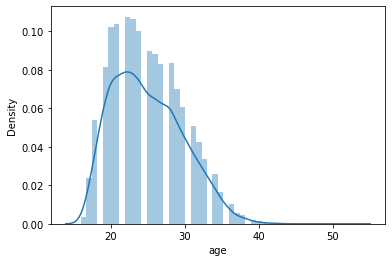

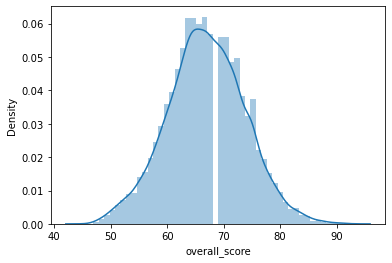

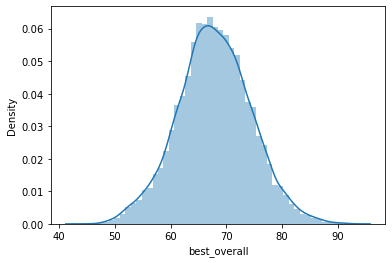

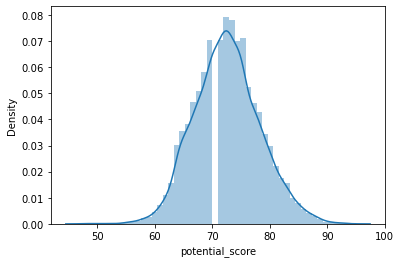

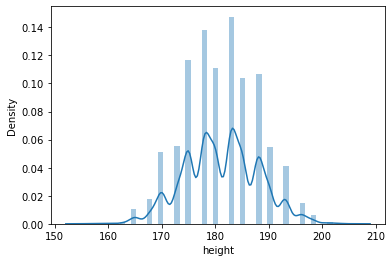

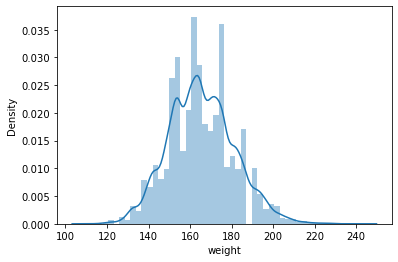

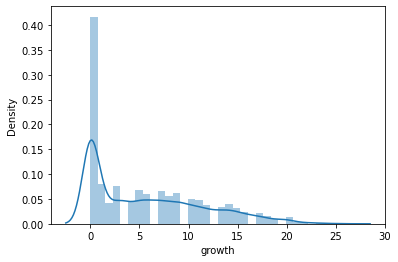

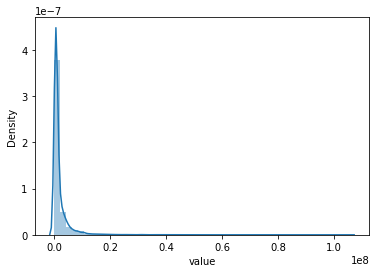

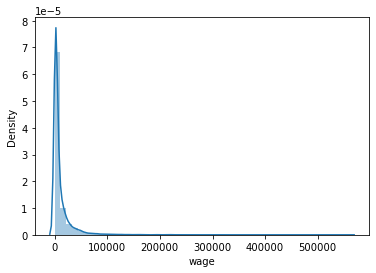

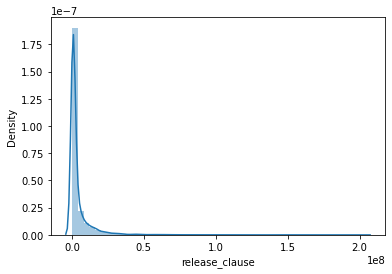

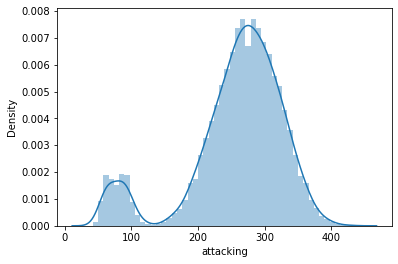

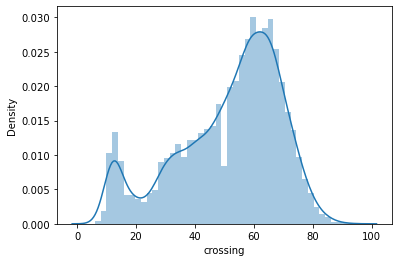

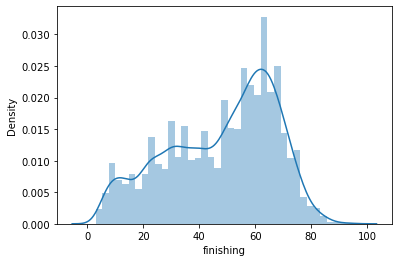

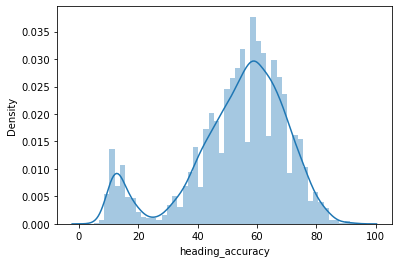

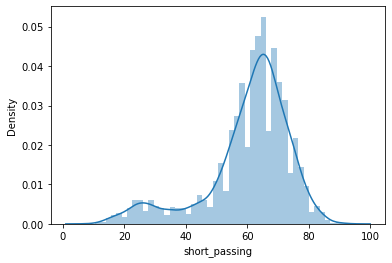

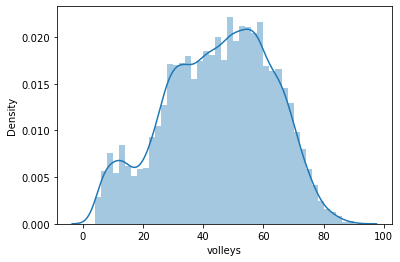

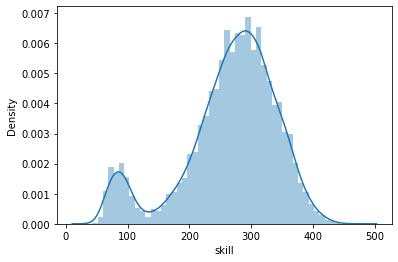

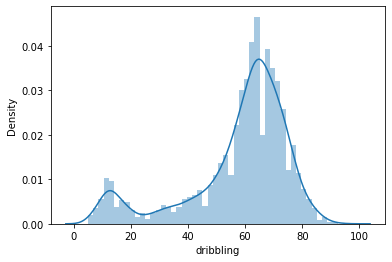

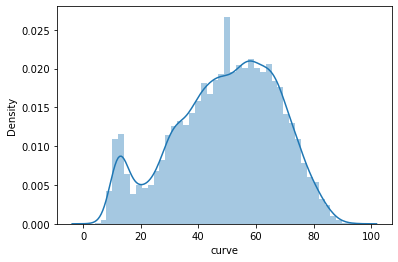

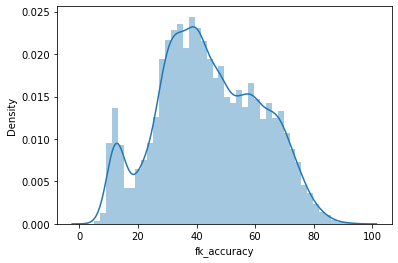

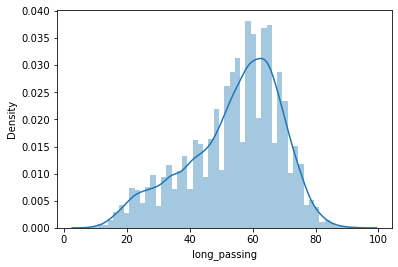

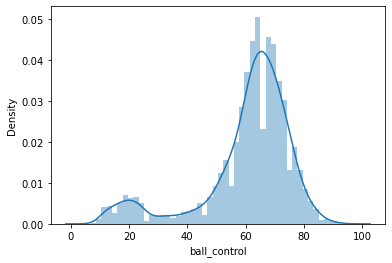

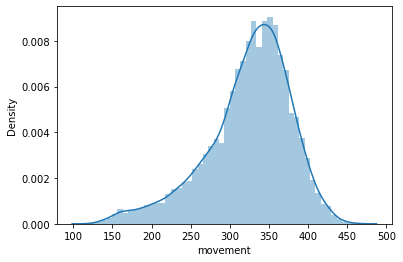

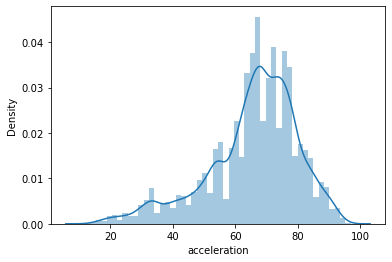

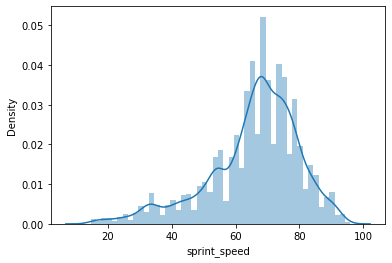

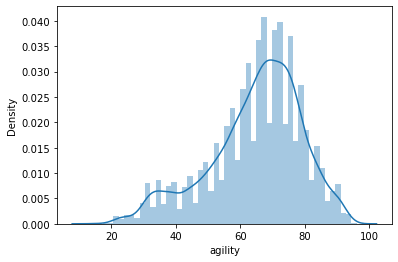

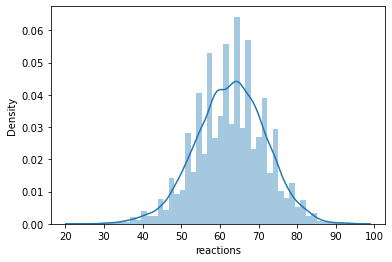

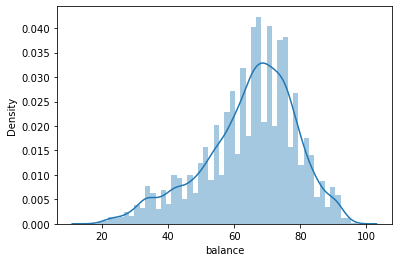

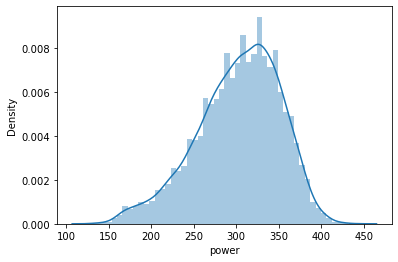

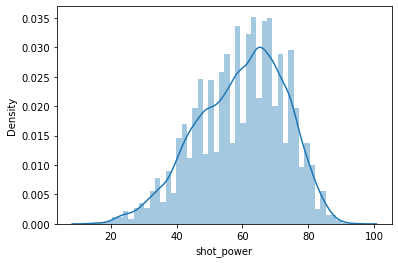

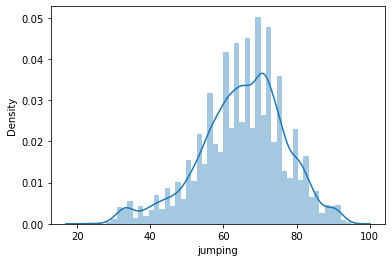

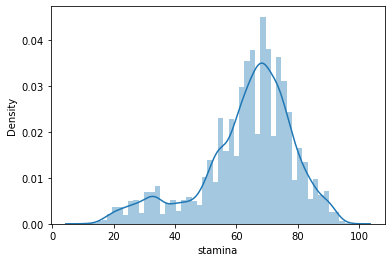

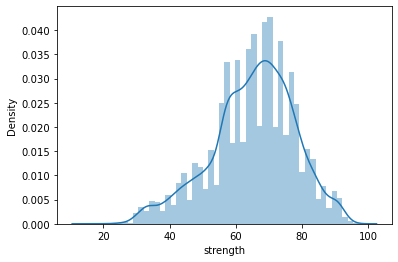

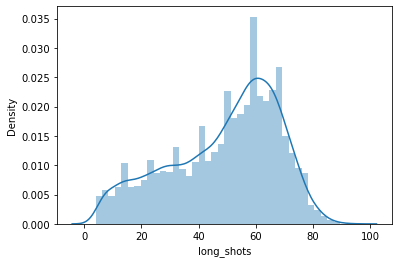

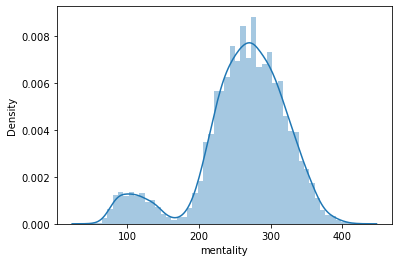

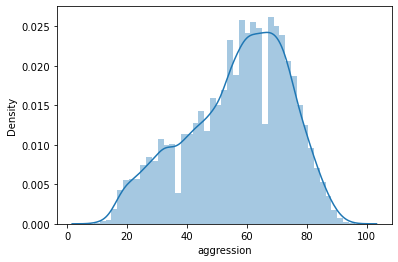

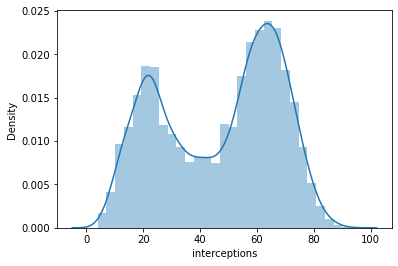

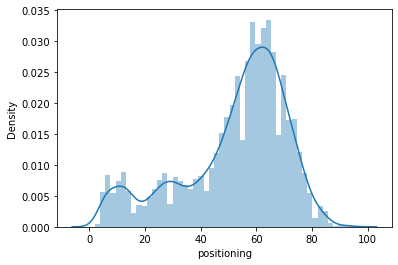

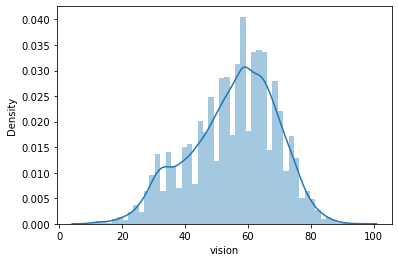

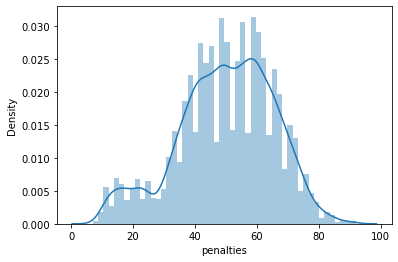

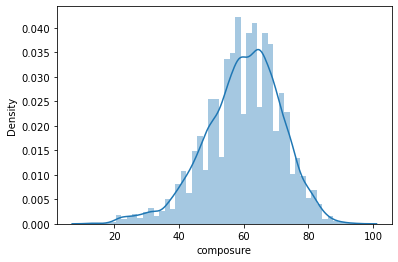

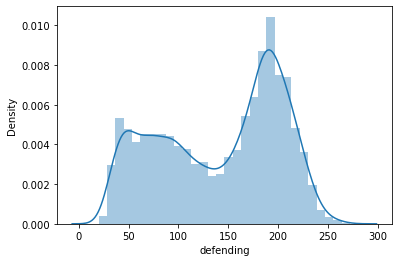

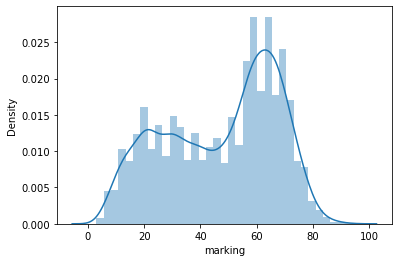

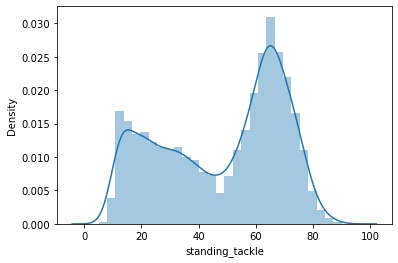

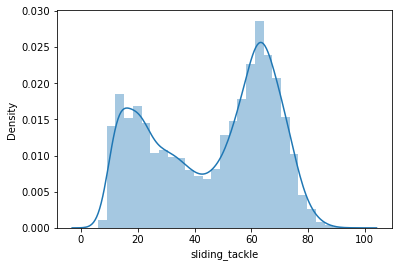

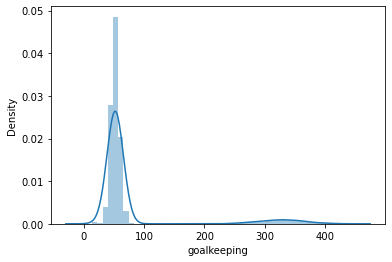

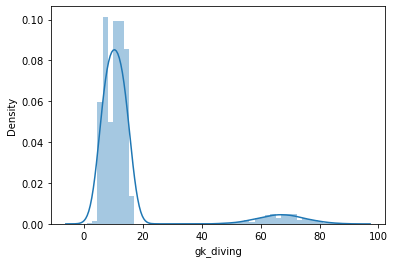

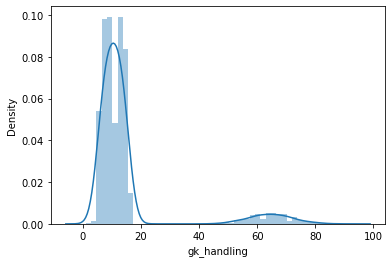

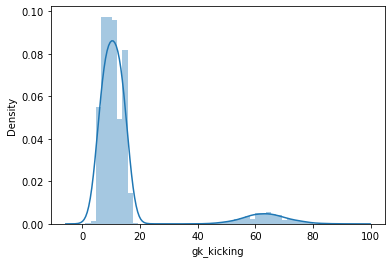

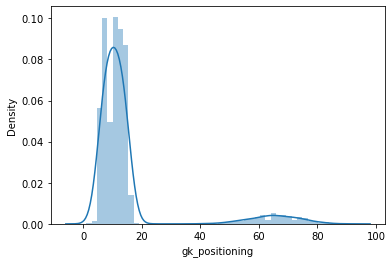

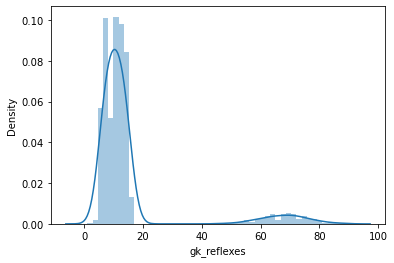

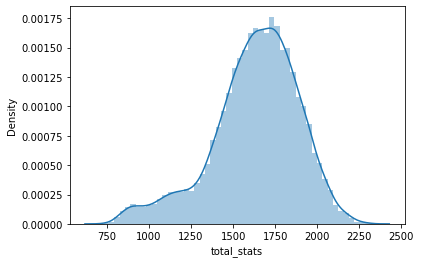

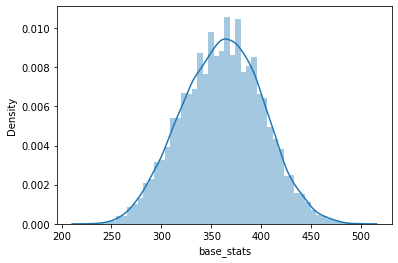

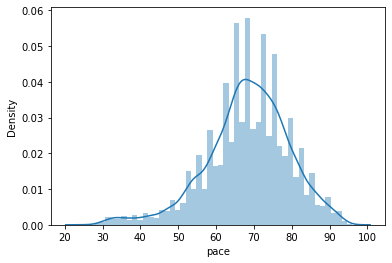

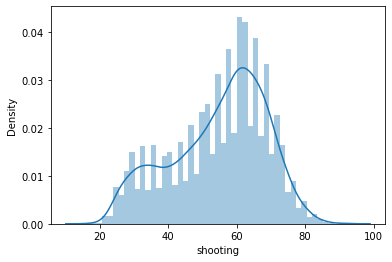

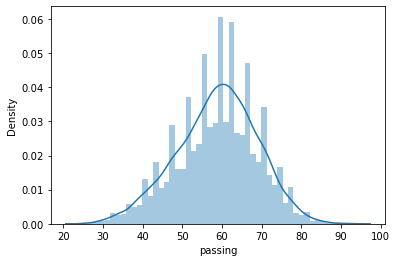

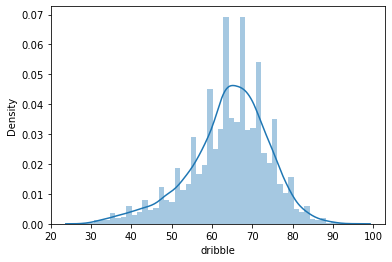

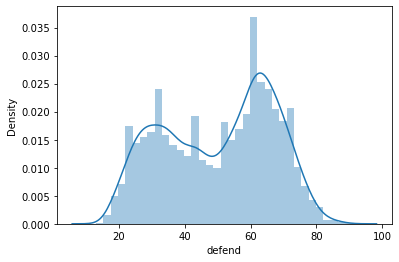

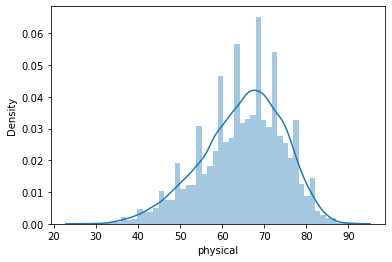

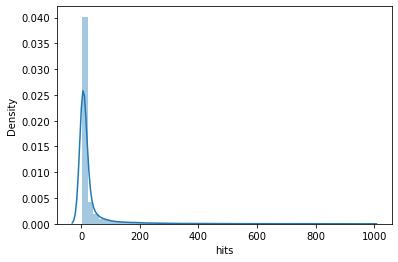

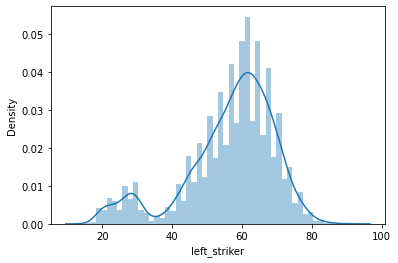

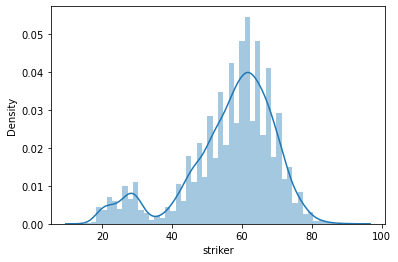

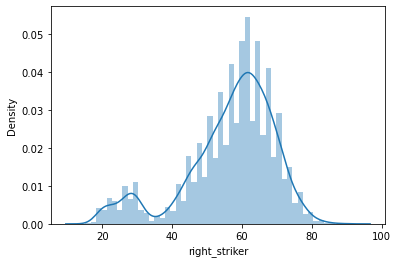

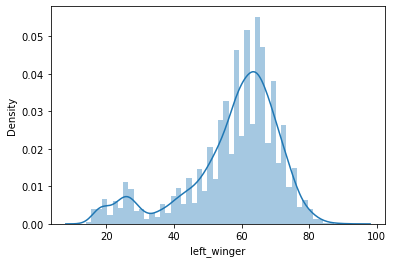

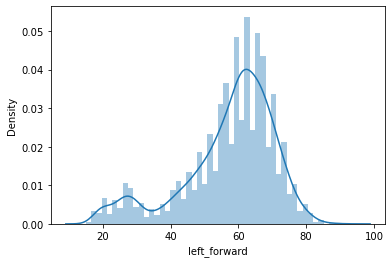

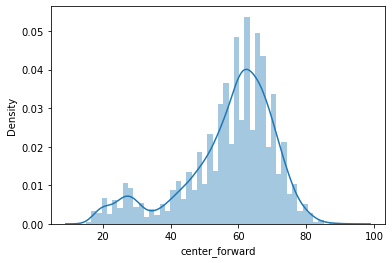

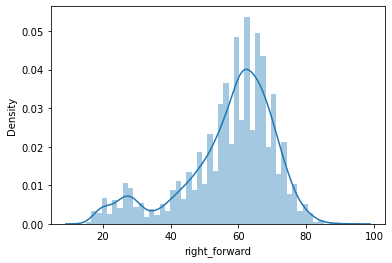

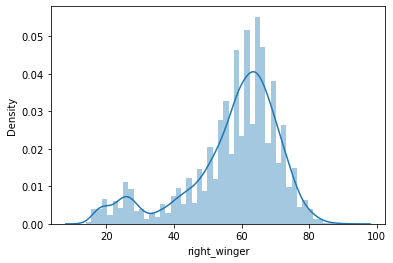

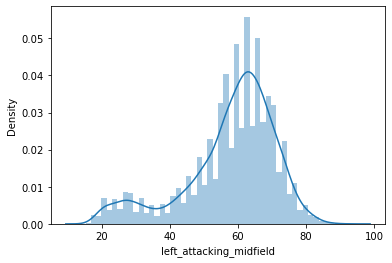

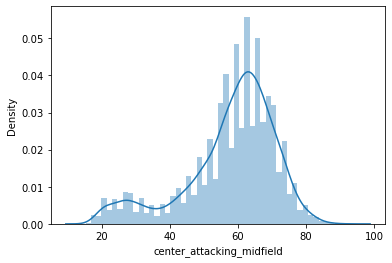

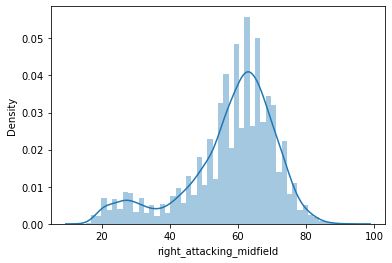

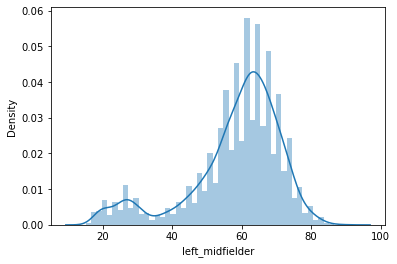

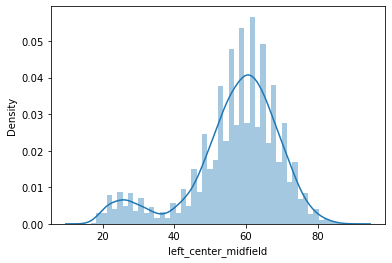

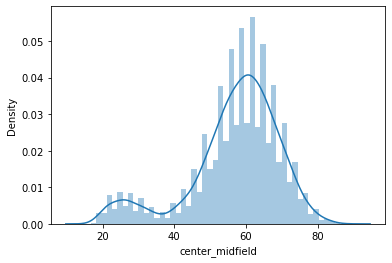

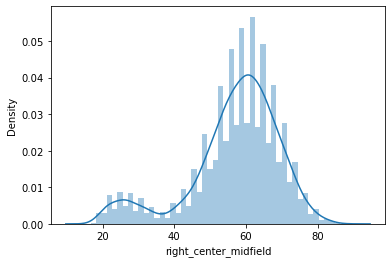

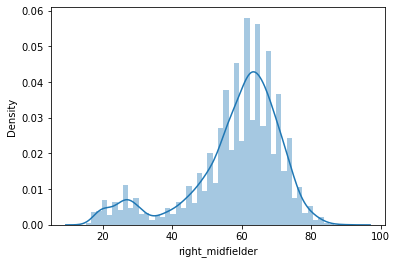

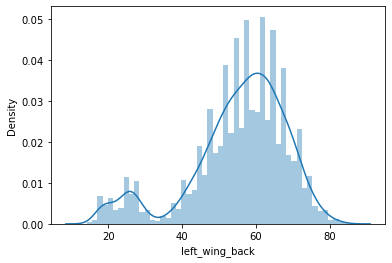

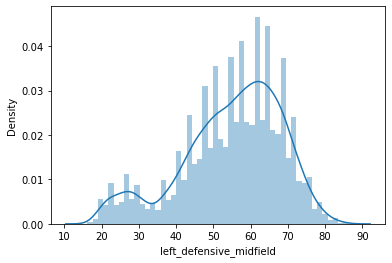

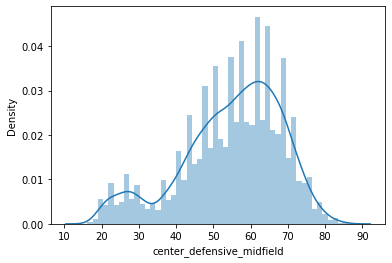

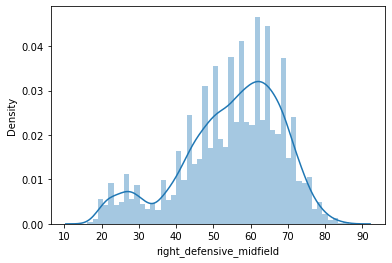

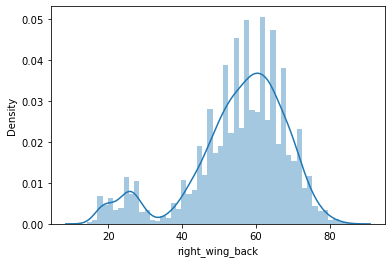

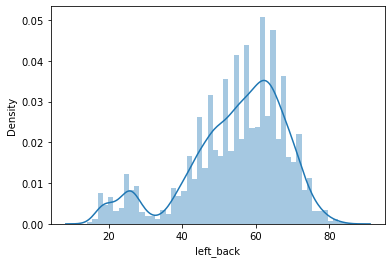

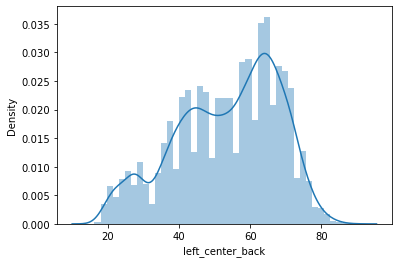

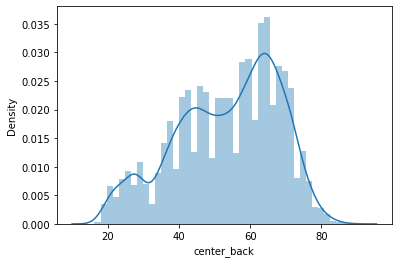

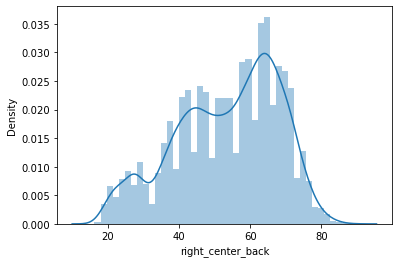

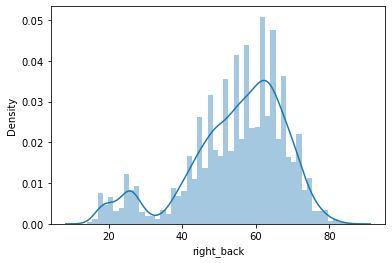

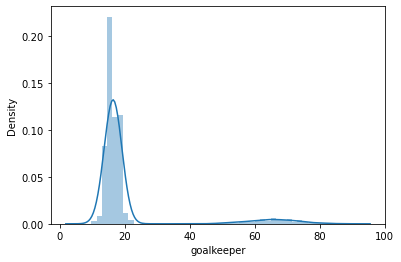

In [54]:
# we want to see the distributions
for column in num.columns:
    sns.distplot(data[column])
    plt.show()
# quite a few are actually Gaussian in shape but we'll normalize anyways and remove outliers

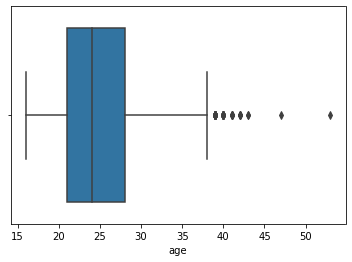

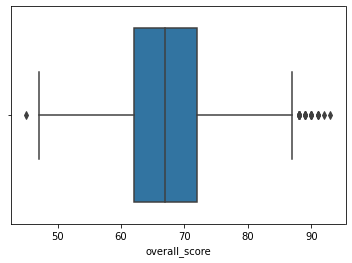

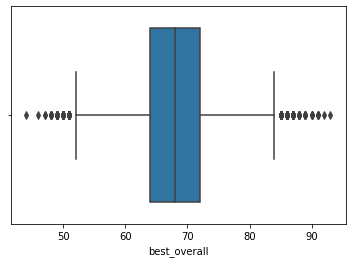

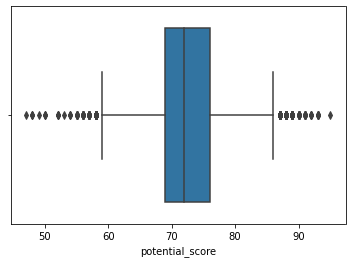

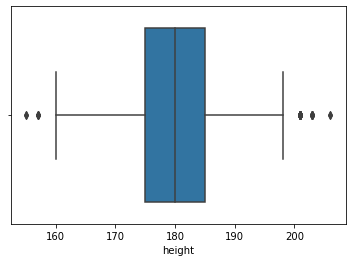

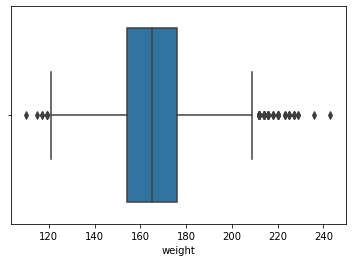

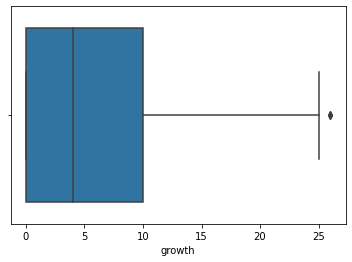

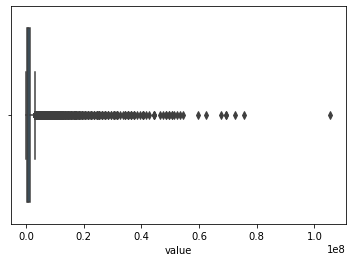

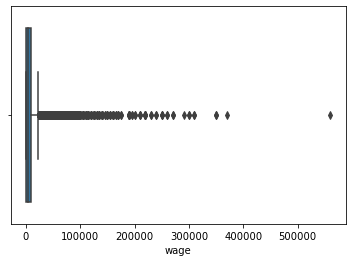

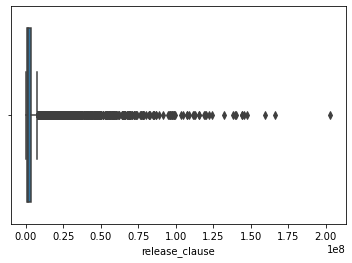

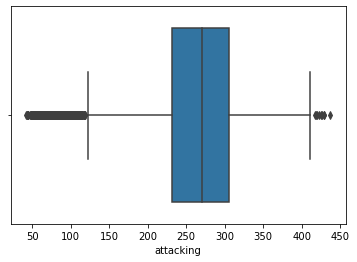

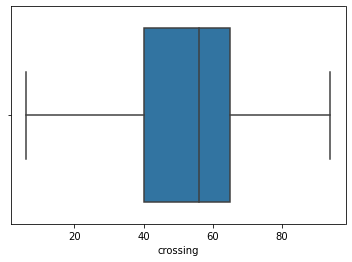

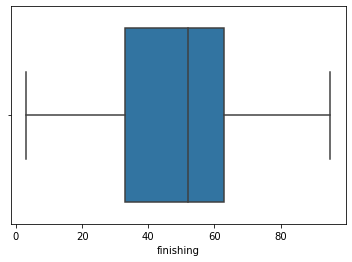

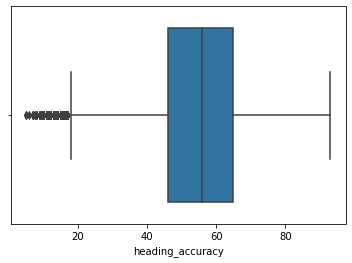

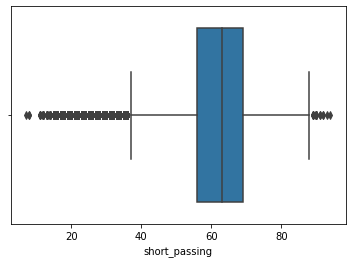

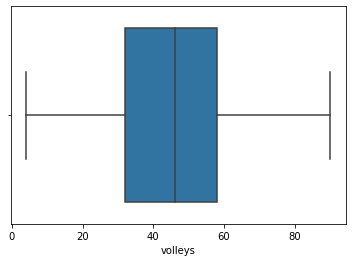

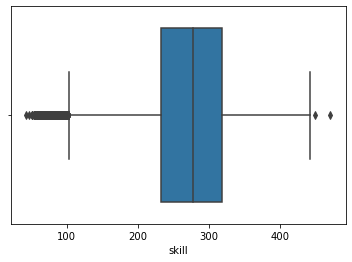

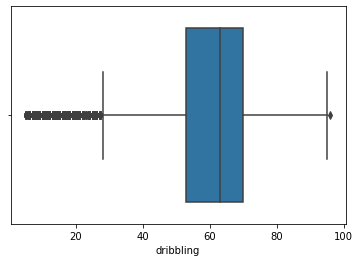

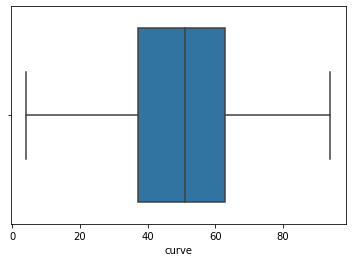

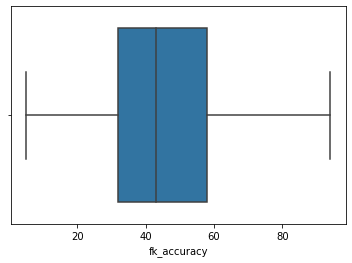

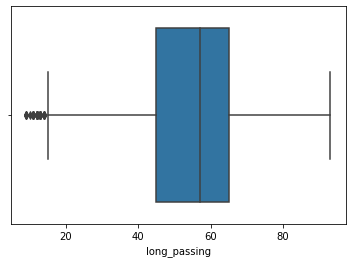

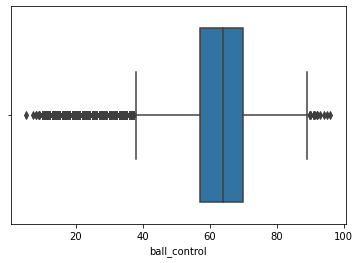

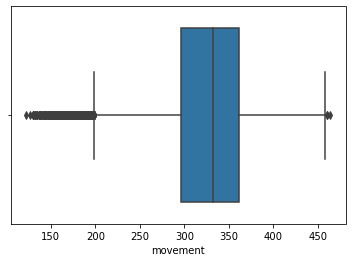

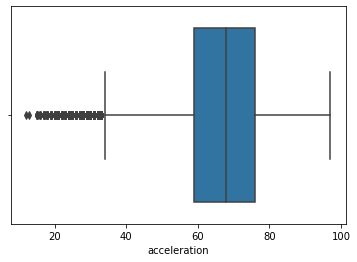

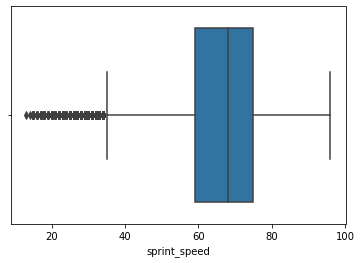

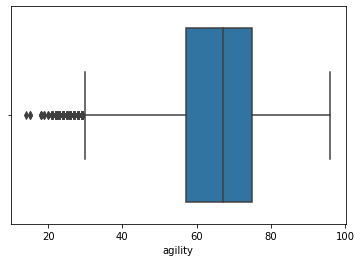

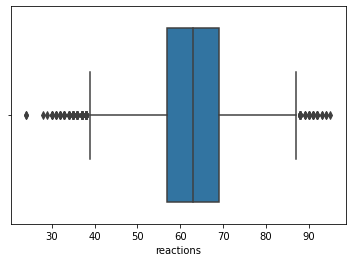

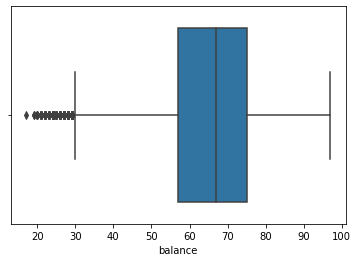

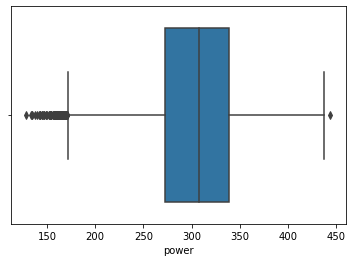

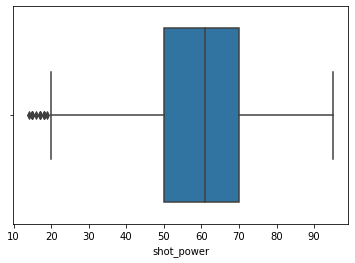

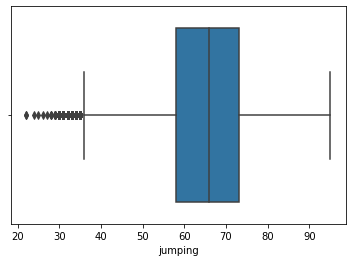

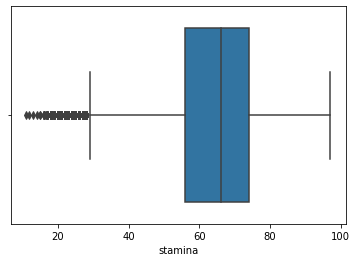

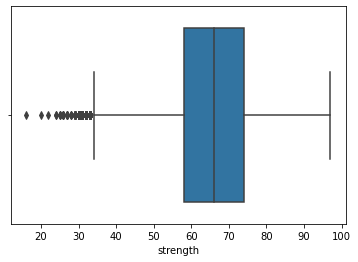

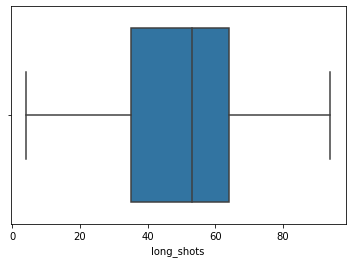

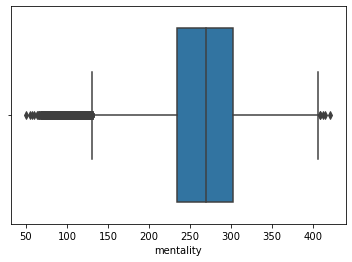

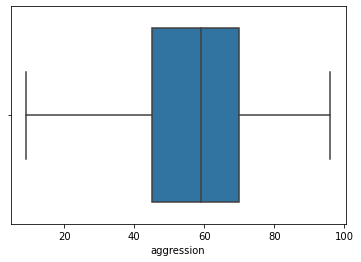

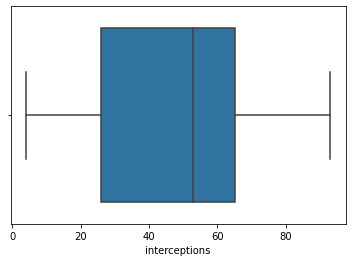

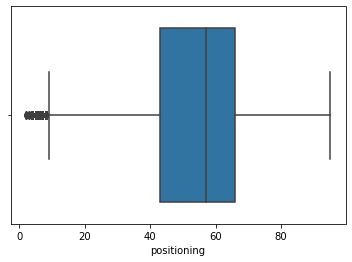

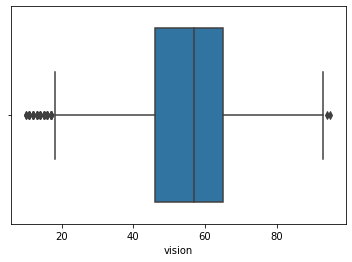

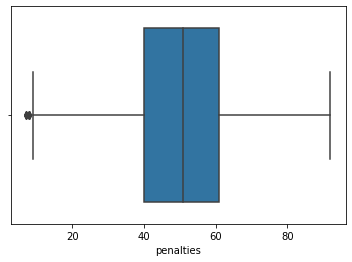

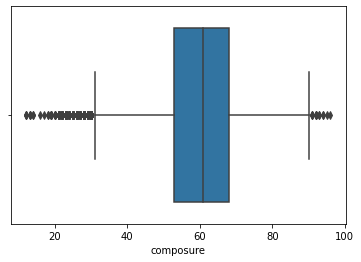

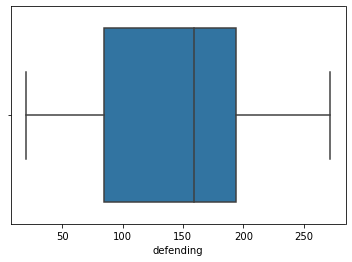

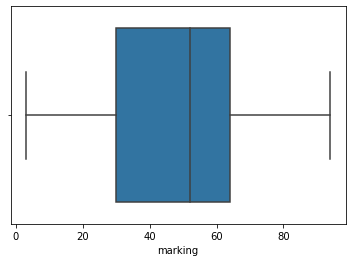

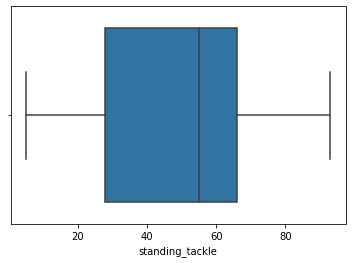

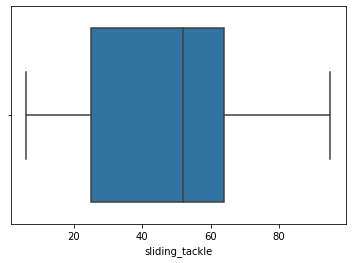

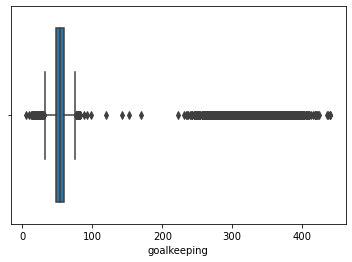

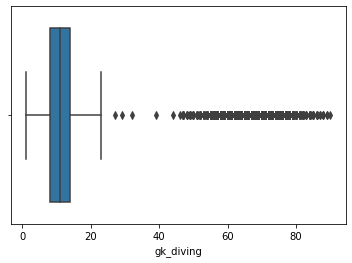

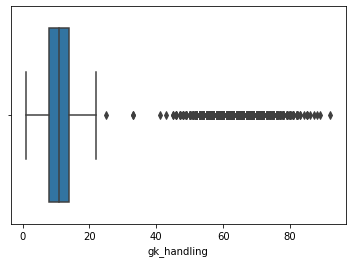

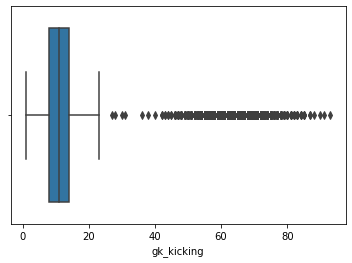

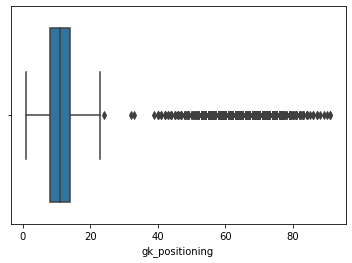

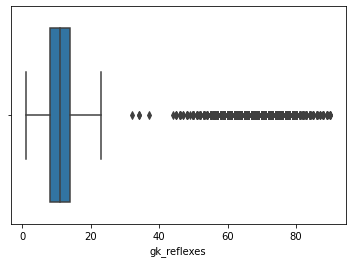

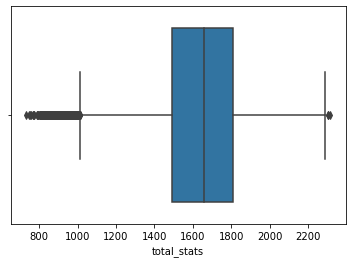

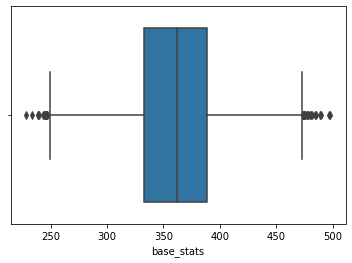

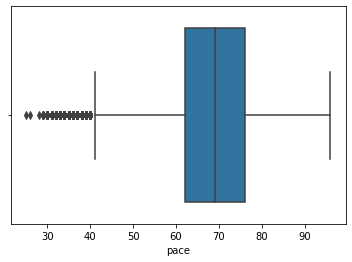

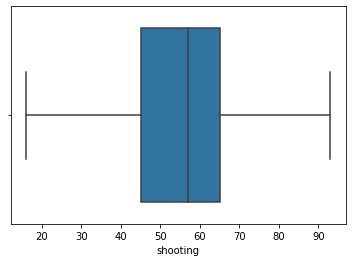

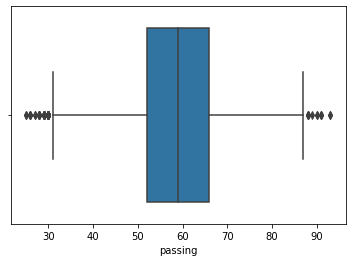

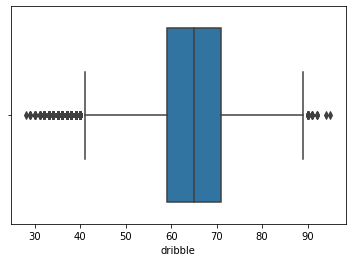

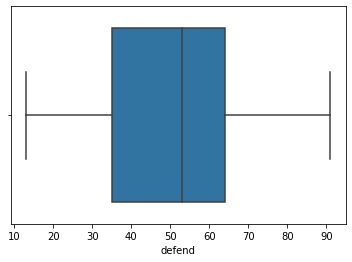

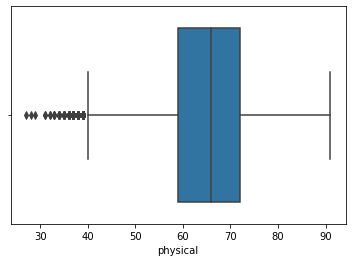

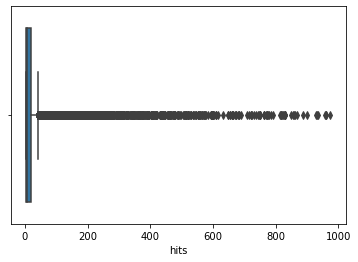

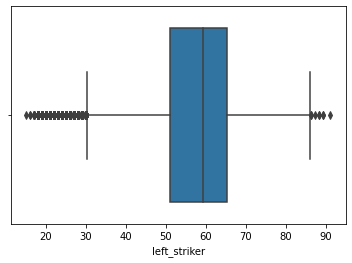

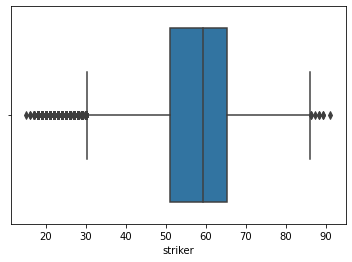

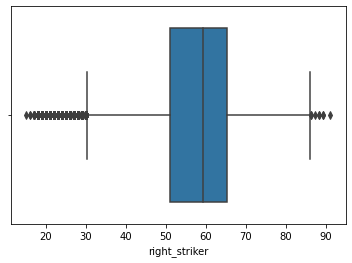

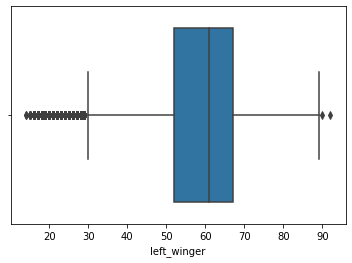

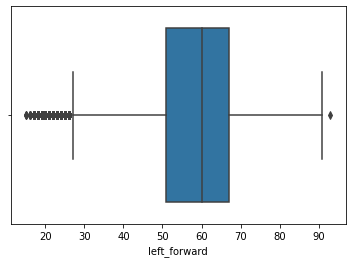

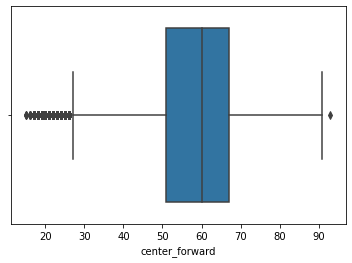

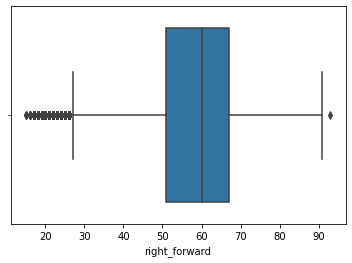

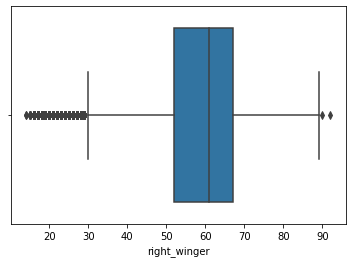

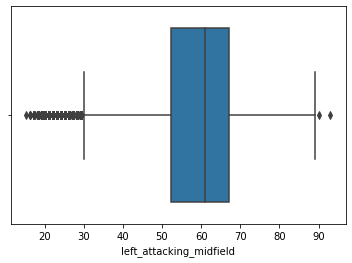

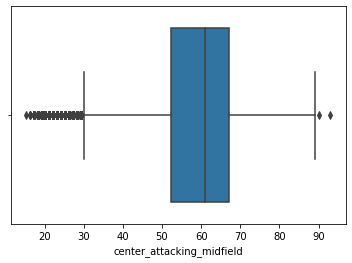

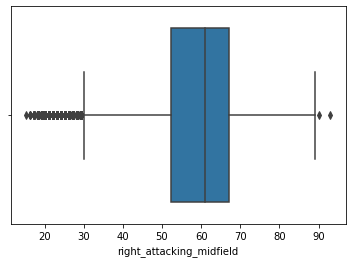

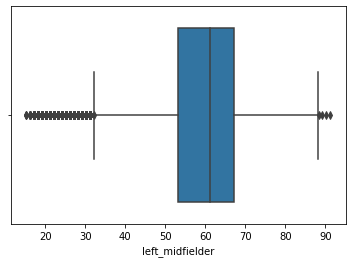

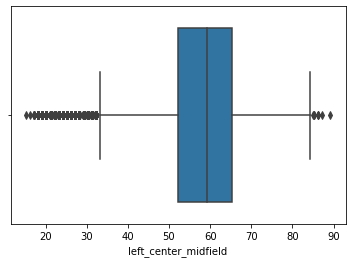

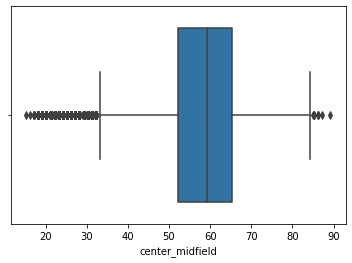

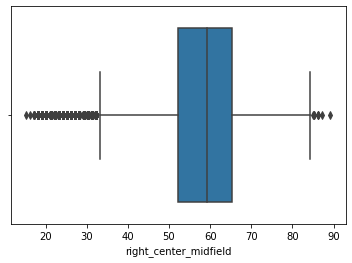

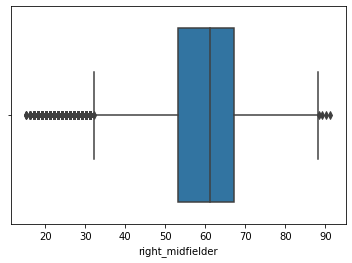

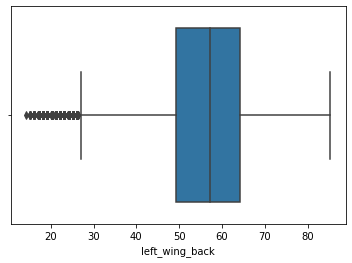

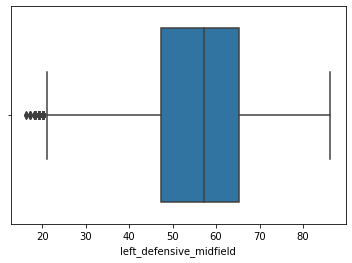

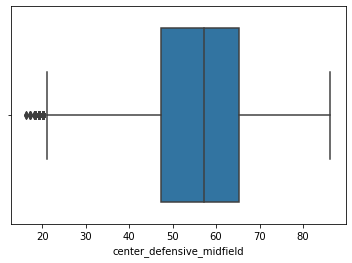

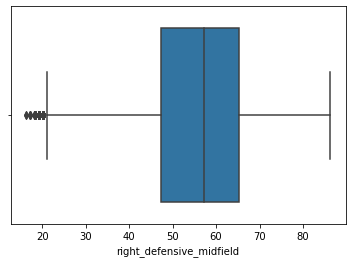

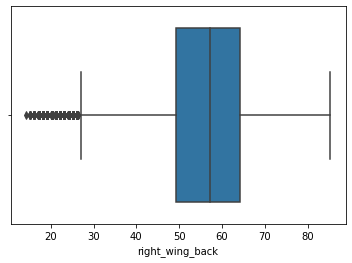

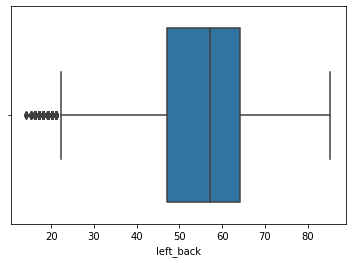

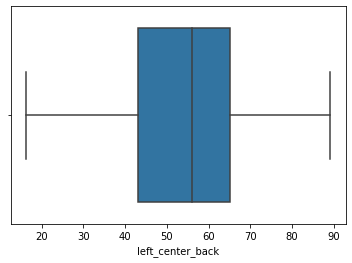

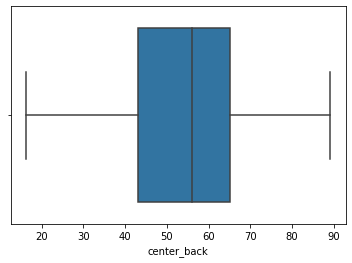

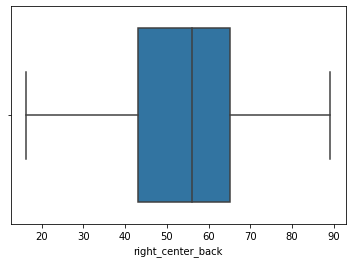

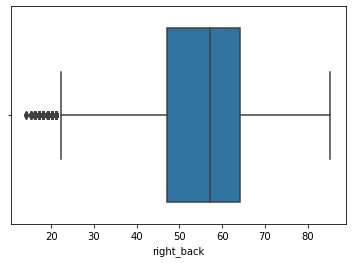

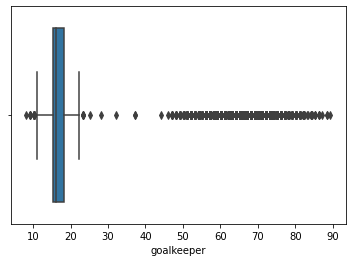

In [55]:
# to better see the outliers
for column in num.columns:
    sns.boxplot(data[column])
    plt.show()

In [56]:
# Checking the correlations
data.corr()

age  overall_score  best_overall  potential_score  \
age                1.000000       0.524508      0.464624        -0.249234   
overall_score      0.524508       1.000000      0.986274         0.586464   
best_overall       0.464624       0.986274      1.000000         0.622311   
potential_score   -0.249234       0.586464      0.622311         1.000000   
height             0.087300       0.023233      0.013639        -0.024040   
...                     ...            ...           ...              ...   
left_center_back   0.213591       0.380252      0.404147         0.188294   
center_back        0.213591       0.380252      0.404147         0.188294   
right_center_back  0.213591       0.380252      0.404147         0.188294   
right_back         0.163055       0.411754      0.440983         0.241770   
goalkeeper         0.153780       0.099360      0.052029         0.029146   

                     height    weight    growth     value      wage  \
age                0.087300  0.247819 -0.864711  0.103351  0.207200   
overall_score      0.023233  0.148856 -0.603919  0.516185  0.595311   
best_overall       0.013639  0.131534 -0.552434  0.522141  0.595491   
potential_score   -0.024040 -0.041143  0.291411  0.450087  0.468083   
height             1.000000  0.764729 -0.051095 -0.000231  0.023395   
...                     ...       ...       ...       ...       ...   
left_center_back  -0.025761  0.018861 -0.263798  0.175790  0.224065   
center_back       -0.025761  0.018861 -0.263798  0.175790  0.224065   
right_center_back -0.025761  0.018861 -0.263798  0.175790  0.224065   
right_back        -0.235737 -0.178754 -0.248380  0.208667  0.251260   
goalkeeper         0.348079  0.330770 -0.088666  0.038901  0.030407   

                   release_clause  attacking  crossing  finishing  \
age                      0.096649   0.191412  0.155716   0.112295   
overall_score            0.582617   0.434488  0.389142   0.306002   
best_overall             0.591453   0.468244  0.401717   0.338816   
potential_score          0.529132   0.234196  0.210825   0.171483   
height                  -0.000098  -0.355056 -0.493486  -0.360541   
...                           ...        ...       ...        ...   
left_center_back         0.187258   0.490112  0.489375   0.105738   
center_back              0.187258   0.490112  0.489375   0.105738   
right_center_back        0.187258   0.490112  0.489375   0.105738   
right_back               0.226907   0.649324  0.698798   0.290875   
goalkeeper               0.044072  -0.735938 -0.625793  -0.556418   

                   heading_accuracy  short_passing   volleys     skill  \
age                        0.174777       0.184277  0.187797  0.176311   
overall_score              0.303799       0.495650  0.361956  0.445583   
best_overall               0.335540       0.536639  0.388248  0.478062   
potential_score            0.132686       0.316875  0.177366  0.267165   
height                     0.061417      -0.353129 -0.333910 -0.455359   
...                             ...            ...       ...       ...   
left_center_back           0.702405       0.664602  0.193559  0.499534   
center_back                0.702405       0.664602  0.193559  0.499534   
right_center_back          0.702405       0.664602  0.193559  0.499534   
right_back                 0.666124       0.795226  0.359679  0.686104   
goalkeeper                -0.697314      -0.688686 -0.548997 -0.681442   

                   dribbling     curve  fk_accuracy  long_passing  \
age                 0.053087  0.182501     0.220698      0.226939   
overall_score       0.355148  0.400832     0.369124      0.484523   
best_overall        0.392367  0.421087     0.387573      0.517605   
potential_score     0.263330  0.223661     0.166428      0.283269   
height             -0.483326 -0.440394    -0.402219     -0.315241   
...                      ...       ...          ...           ...   
left_center_back    0.417069  0.350178     0.

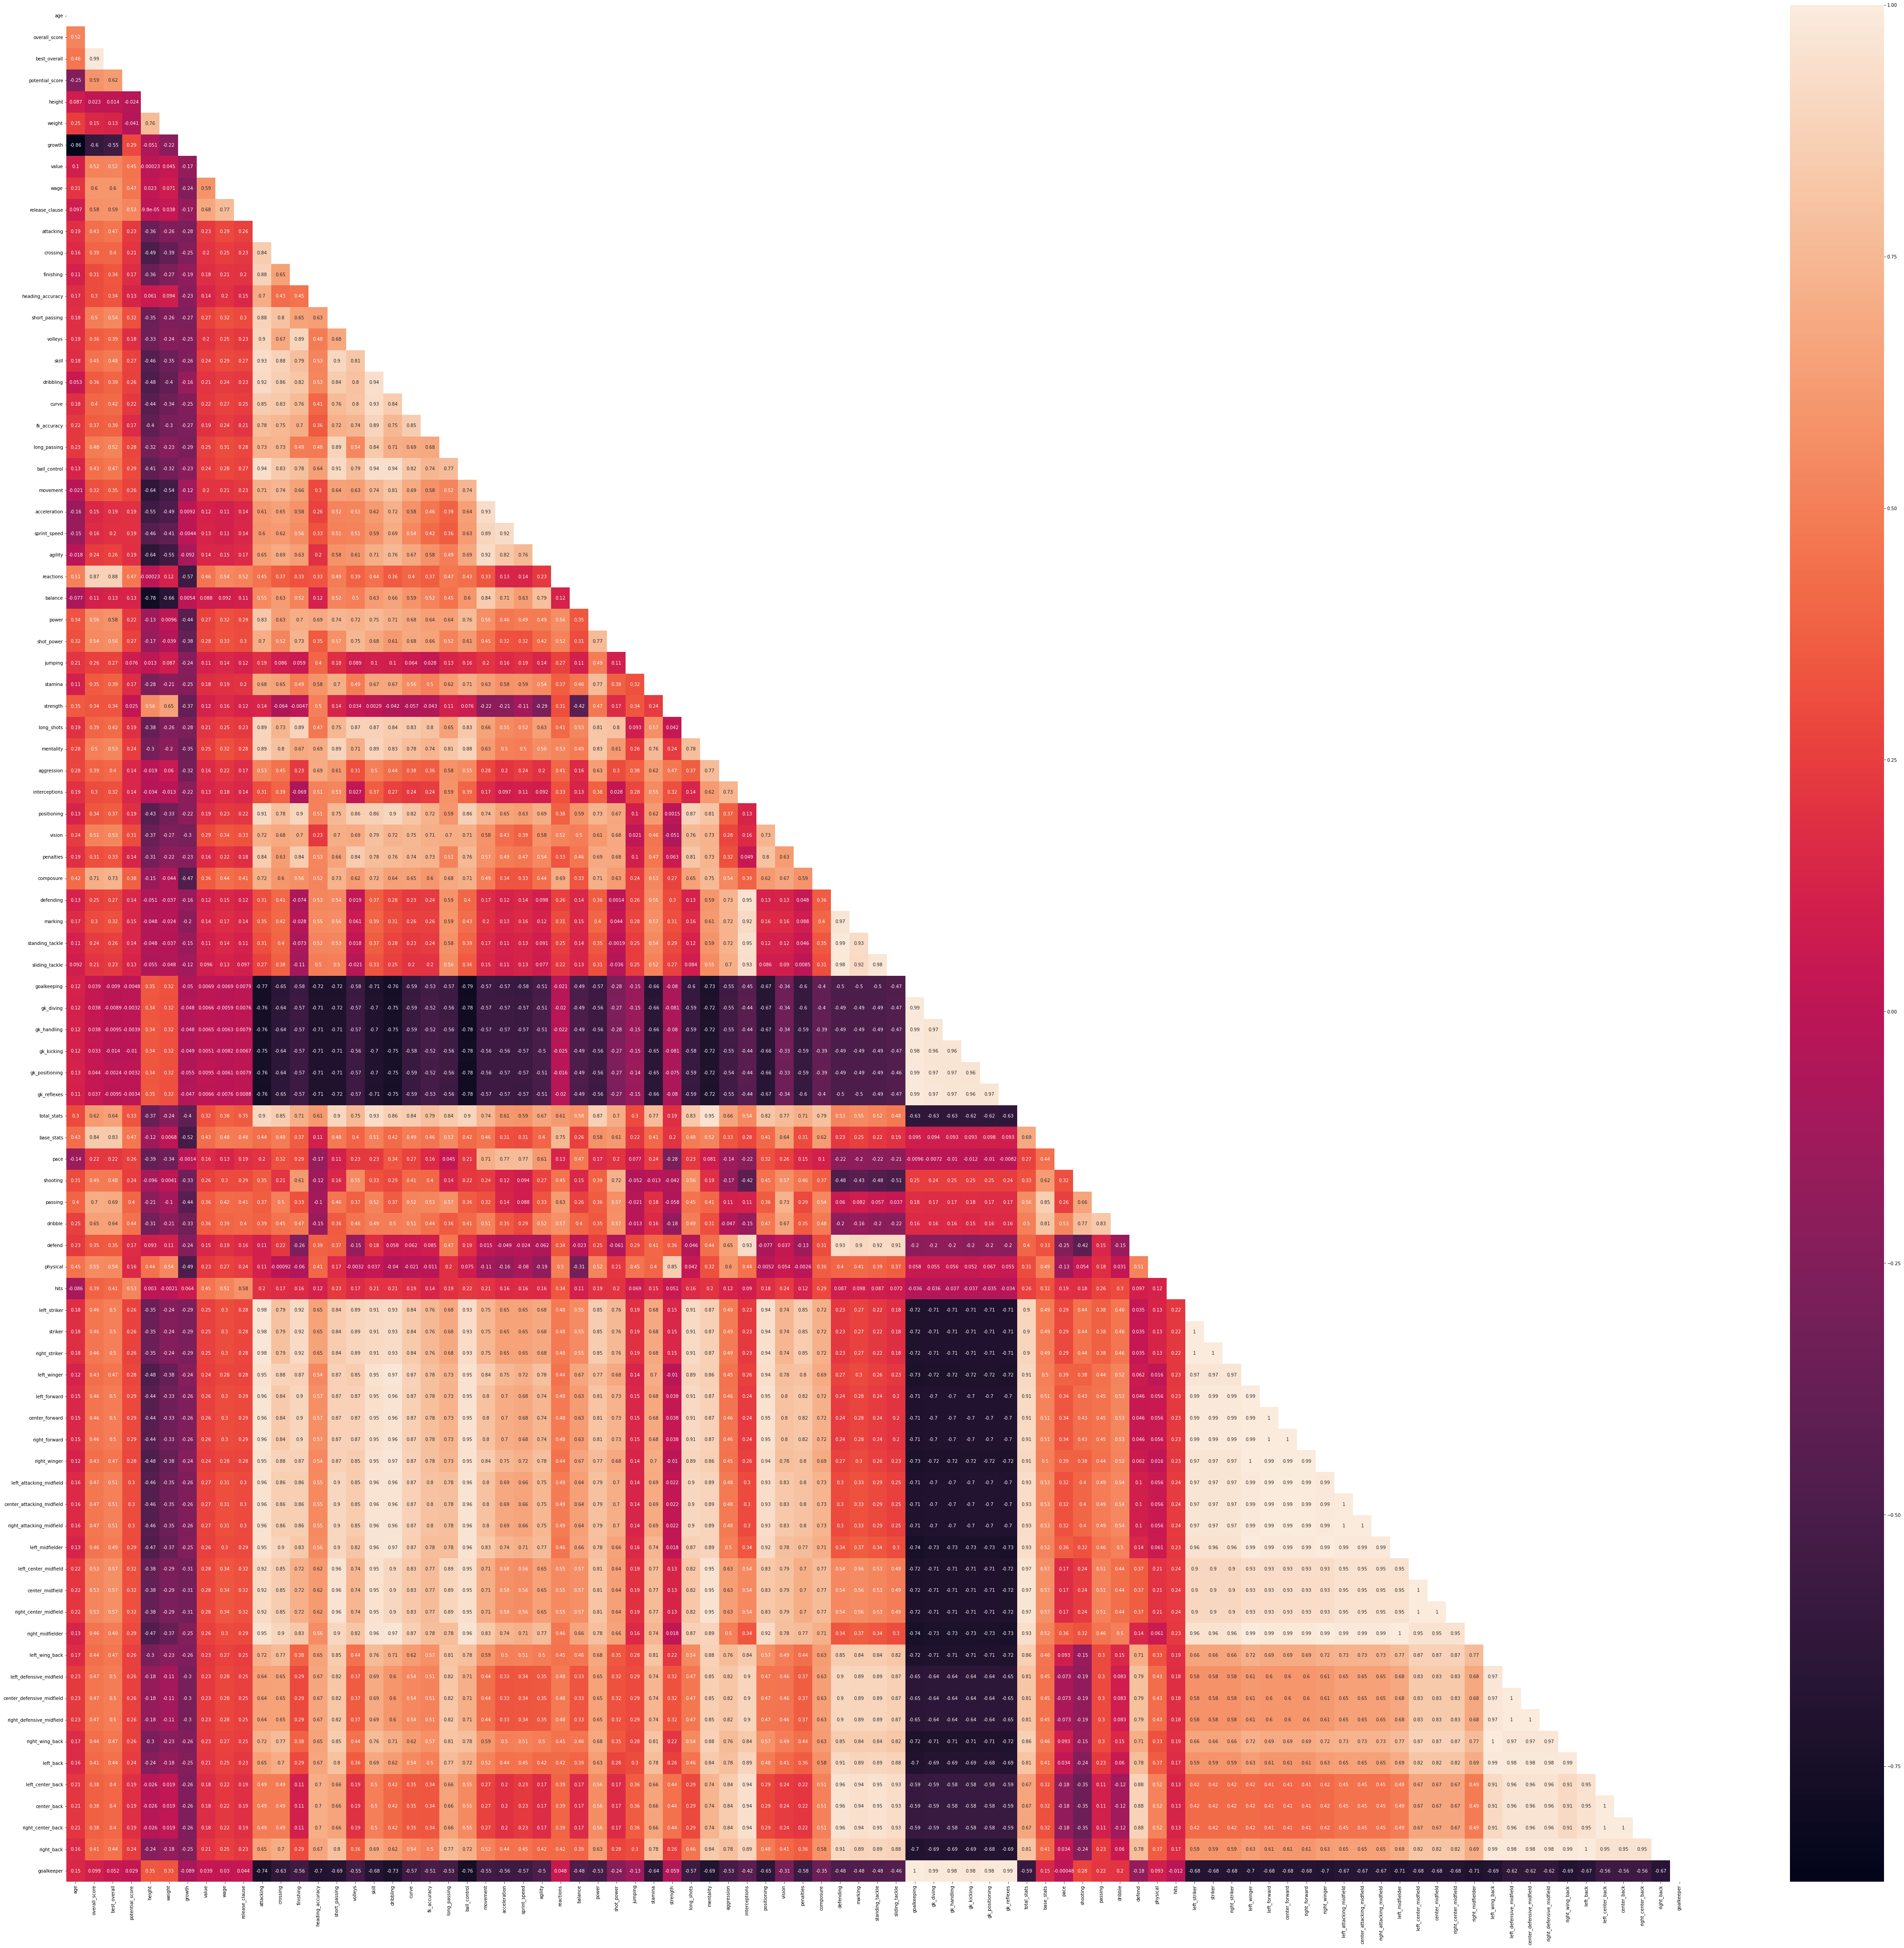

In [57]:
#HEATMAP
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(80, 76))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

# first observations:
# value, wage and release clause highly correlated to each other (around 0.6)
# postions very highly correlated (>0.95) to stats that fit positions, ie. attacking positions corrlated to attacking stats
  # => for the future rounds: 
    # positions and stats are highly correlated data:
    # repetition of exogenous variables can twist the model, will probably be dropped

In [58]:
# CLEANING CATEGORICAL DATA
# starred data cleaning (you can also have one for loop if I think about it now, this is just how I went thinking about it)
star_columns = ['weak_foot', 'skill_moves', 'international_reputation']

# Check unique values
# Select only the first character from the string
# Convert data type from object to integer
# Check that the transformation was successful
for column in star_columns:
    print(data[column].unique())
    data[column] = data[column].str[0]
    data[column] = pd.to_numeric(data[column], errors='raise')
    print(data[column].dtypes)

['4 ★' '2 ★' '5 ★' '1 ★' '3 ★']
int64
['3★' '4★' '1★' '2★' '5★']
int64
['1 ★' '4 ★' '2 ★' '3 ★' '5 ★']
int64


In [59]:
data['nationality'].unique()
# remove &amp;
# change China PR to China
# DR Congo to Democratic Republic of the Congo
# DPR Korea to North Korea

array(['Spain', 'Turkey', 'Republic of Ireland', 'Italy', 'Netherlands',
       'Germany', 'Portugal', 'England', 'Brazil', 'United States',
       'Czech Republic', 'Cameroon', 'Scotland', 'France', 'Ivory Coast',
       'Chile', 'Peru', 'Paraguay', 'Mexico', 'Japan', 'Nigeria',
       'Sweden', 'Belarus', 'Ghana', 'Norway', 'Belgium', 'Argentina',
       'Wales', 'Australia', 'Northern Ireland', 'Switzerland', 'Togo',
       'Canada', 'Poland', 'Austria', 'Denmark', 'Iceland', 'Morocco',
       'Jamaica', 'Korea Republic', 'North Macedonia', 'Greece',
       'Senegal', 'Slovenia', 'Uruguay', 'Madagascar', 'Croatia',
       'Estonia', 'Bosnia Herzegovina', 'Hungary', 'Ukraine', 'Kosovo',
       'Russia', 'Romania', 'Bulgaria', 'Finland', 'Mali', 'China PR',
       'Trinidad &amp; Tobago', 'Burkina Faso', 'Panama', 'Venezuela',
       'Benin', 'Israel', 'South Africa', 'Cyprus', 'Haiti', 'Slovakia',
       'Colombia', 'Serbia', 'Ecuador', 'New Zealand', 'Honduras',
       'Bolivia', 'E

In [60]:
data["nationality"] = data["nationality"].apply(lambda x: "Democratic Republic of the Congo" if str(x).startswith("DR")
                                                 else "North Korea" if str(x).endswith("DPR")
                                                 else "China" if str(x).endswith("PR")
                                                 else str(x).replace("&amp;","and") if "&amp;" in x
                                                 else x)
data['nationality'].unique()

array(['Spain', 'Turkey', 'Republic of Ireland', 'Italy', 'Netherlands',
       'Germany', 'Portugal', 'England', 'Brazil', 'United States',
       'Czech Republic', 'Cameroon', 'Scotland', 'France', 'Ivory Coast',
       'Chile', 'Peru', 'Paraguay', 'Mexico', 'Japan', 'Nigeria',
       'Sweden', 'Belarus', 'Ghana', 'Norway', 'Belgium', 'Argentina',
       'Wales', 'Australia', 'Northern Ireland', 'Switzerland', 'Togo',
       'Canada', 'Poland', 'Austria', 'Denmark', 'Iceland', 'Morocco',
       'Jamaica', 'Korea Republic', 'North Macedonia', 'Greece',
       'Senegal', 'Slovenia', 'Uruguay', 'Madagascar', 'Croatia',
       'Estonia', 'Bosnia Herzegovina', 'Hungary', 'Ukraine', 'Kosovo',
       'Russia', 'Romania', 'Bulgaria', 'Finland', 'Mali', 'China',
       'Trinidad and Tobago', 'Burkina Faso', 'Panama', 'Venezuela',
       'Benin', 'Israel', 'South Africa', 'Cyprus', 'Haiti', 'Slovakia',
       'Colombia', 'Serbia', 'Ecuador', 'New Zealand', 'Honduras',
       'Bolivia', 'Egypt'

In [61]:
# Explore the contract data
data['contract'].unique()

array(['2014 ~ 2019', '2018 ~ 2021', '2019 ~ 2020', '2011 ~ 2022',
       '2019 ~ 2021', '1993 ~ 2017', '2020 ~ 2021', '2002 ~ 2018',
       '2014 ~ 2018', '2015 ~ 2017', '2017 ~ 2021', '2018 ~ 2019', 'Free',
       '2015 ~ 2023', '2015 ~ 2020', '2017 ~ 2019', '2017 ~ 2020',
       '2018 ~ 2020', '2016 ~ 2018', '2013 ~ 2017', '2016 ~ 2017',
       '2017 ~ 2018', '2016 ~ 2023', '2016 ~ 2019', '2014 ~ 2021',
       '2019 ~ 2023', '2020 ~ 2022', '2018 ~ 2022', '2006 ~ 2018',
       '2016 ~ 2020', '2019 ~ 2019', '2007 ~ 2020', '2014 ~ 2023',
       '2017 ~ 2017', '2015 ~ 2022', '2015 ~ 2021', '2014 ~ 2017',
       '2014 ~ 2020', '2016 ~ 2021', '2015 ~ 2019', '2012 ~ 2018',
       'Jun 30, 2018 On Loan', '2010 ~ 2019', '2018 ~ 2018',
       '2015 ~ 2018', '2020 ~ 2020', '2012 ~ 2017', '2011 ~ 2018',
       '2003 ~ 2022', '2019 ~ 2024', '2011 ~ 2021', '2011 ~ 2020',
       '2016 ~ 2022', '2012 ~ 2020', '2019 ~ 2025', '2017 ~ 2022',
       '2009 ~ 2019', '2017 ~ 2023', '2000 ~ 2020',
       '

In [62]:
# As the end of the contract is typically represented by the last 4 characters of the strings, 
# we will extract those where possible:
def clean_contract(x):
    try:
        x = int(x[-4:])
    except:
        pass
    return x

In [68]:
data['contract'] = data['contract'].apply(clean_contract)
# We'll now check what non-integer values remained in the column:
data['contract'].unique()

array([2019, 2021, 2020, 2022, 2017, 2018, 'Free', 2023,
       'Jun 30, 2018 On Loan', 2024, 2025, 'May 31, 2021 On Loan',
       'May 31, 2018 On Loan', 'Jun 30, 2021 On Loan',
       'May 31, 2019 On Loan', 'Dec 31, 2020 On Loan',
       'Jun 30, 2020 On Loan', 'Jun 30, 2017 On Loan',
       'Jan 30, 2021 On Loan', 'Jun 30, 2019 On Loan',
       'Aug 31, 2020 On Loan', 'Jan 1, 2021 On Loan',
       'Dec 31, 2021 On Loan', 'Jun 1, 2021 On Loan',
       'Jan 31, 2021 On Loan', 'Jul 5, 2021 On Loan',
       'May 31, 2020 On Loan', 'Jun 30, 2022 On Loan', 2026,
       'FC Luzern Jun 30, 2021 On Loan', 'Ivory Coast Free',
       'Carpi Jun 30, 2018 On Loan', 'Middlesbrough Jun 30, 2017 On Loan',
       2028, 'Monterrey Jun 30, 2021 On Loan',
       'GD Chaves Jun 30, 2018 On Loan',
       'Boca Juniors Jun 30, 2020 On Loan', 'Nov 27, 2021 On Loan',
       'Jun 23, 2021 On Loan', 'Jan 17, 2021 On Loan',
       'Dec 31, 2019 On Loan', 'Nov 30, 2020 On Loan',
       'Jul 1, 2021 On Loan',
 

In [69]:
# As there are many values ending with 'On Loan', we'll first check that these are not
# equivalent to the joined date by looking at some data samples. Additionally,
# we also want to see if the "Country Free" is related to the nationality of the player:
print(data.loc[:, ['contract', 'joined', 'nationality']].head(50))
print(data.loc[:, ['contract', 'joined', 'nationality']].tail(50))

      contract        joined          nationality
id                                               
16        2019  Jul 19, 2014                Spain
41        2021  Jul 16, 2018                Spain
80        2020   Jul 2, 2019               Turkey
330       2022   Aug 1, 2011  Republic of Ireland
1179      2021   Jul 4, 2019                Italy
1238      2017   Jan 1, 1993                Italy
2147      2021   Aug 5, 2020          Netherlands
2196      2018  Jul 28, 2002              Germany
2492      2018  Jul 24, 2014             Portugal
2651      2017  Jul 10, 2015  Republic of Ireland
2702      2021   Sep 4, 2020              England
3467      2021  Jan 15, 2017               Brazil
3484      2019   Jul 1, 2018  Republic of Ireland
3622      Free   Jan 1, 2016             Portugal
5471      2023   Jul 1, 2015              England
5479      2020  Jul 12, 2015                Spain
5879      2019   Oct 3, 2017                Italy
6826      2020  Aug 15, 2017              England


In [70]:
# We'll now remove the 'On Loan' string from the Contract column to extract the year and
# replace all 'Country Free' values with NaN:
def clean_loans(x):
    try:
        x = int(x.replace(" On Loan", "")[-4:])
    except:
        x = np.nan
    return x   

In [71]:
data['contract'] = data['contract'].apply(clean_loans)

In [72]:
data['contract'].unique()

array([  nan, 2018., 2021., 2019., 2020., 2017., 2022., 2023.])

In [77]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())
    else:
        print("No NaN left in this dataframe")

contract : 15519
hits : 64


In [78]:
data = data.dropna()

In [81]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())
    else:
        print("No NaN left in this dataframe")
        break

No NaN left in this dataframe


In [82]:
print(round(max(list(data.isna().sum()))/len(data['name'])*100, 0),"%")
# after dropping column with 95% null values, the max null values we get for 1 column is 2% so we can drop the null values

0.0 %
